# Introducción a las Series de Tiempo

- En esta sección se presentan algunos métodos estadísticos básicos, los cuales son esenciales para ***modelar, analizar y predecir datos de series temporales***. Se presentan gráficos y resúmenes numéricos de las propiedades de los datos de series temporales. También se analiza el uso de ***transformaciones y ajustes de datos en la predicción*** y algunos métodos ampliamente utilizados para caracterizar y controlar el rendimiento de un modelo predictivo.

- Algunos aspectos de como las medidas de rendimiento pueden usarse para ***seleccionar entre técnicas de predicción*** son presentados. Las predicciones se basan en datos u observaciones sobre la variable de interés. Estos datos suelen adoptar la forma de una serie temporal.

## Diferentes tipos de datos

Los analistas de negocio y científicos de datos se encuentran con ***diferentes tipos de datos en sus proyectos de análisis***. La mayoría de los datos que se suelen encontrar en proyectos académicos e industriales se pueden clasificar a grandes rasgos en las siguientes categorías:

- ***`Datos transversales`***
- ***`Datos de series temporales`***
- ***`Datos de panel`***

Comprender qué tipo de datos se necesitan para resolver un problema y qué tipo de datos pueden obtenerse de las fuentes disponibles es importante para formular el problema y elegir el tipo de modelo más adecuado.

## Datos transversales

- Los datos transversales o de corte transversal de una población ***se obtienen tomando observaciones de múltiples individuos en el mismo momento***. Los datos transversales *pueden incluir observaciones tomadas en distintos momentos, pero en estos casos el tiempo no desempeña ningún papel significativo en el análisis*. Los resultados de la selectividad de los estudiantes es un ejemplo de datos transversales. El ***producto interno bruto de los países y los datos para el análisis de pérdida de clientes*** es otro ejemplo de datos transversales. 

```{admonition} Observación
:class: tip

- En esencia, los datos transversales representan un ***instante o momento dado***. Sin embargo, los datos de clientes para el ***análisis de rotación pueden obtenerse a lo largo de un periodo de tiempo***, como años y meses. ***Pero, a efectos de análisis, el tiempo puede no desempeñar un papel importante*** y, por lo tanto, aunque los datos de rotación de clientes pueden obtenerse de múltiples puntos en el tiempo, ***pueden seguir considerándose como un conjunto de datos transversal***.
```

- A menudo, el análisis de datos transversales comienza con un gráfico de las variables, para visualizar sus propiedades estadísticas como la ***tendencia central, la dispersión, la asimetría y la curtosis***. En el siguiente ejemplo univariado se muestra el ***`Gasto militar como porcentaje del Producto Interno Bruto`*** de 85 países en el año 2010. Los ***datos usados en el presente curso se encuentran en el repositorio*** [Dataset for TSF](https://github.com/lihkir/Data/blob/main/datasets.zip).

- ***Al tomar los datos de un solo año aseguramos su naturaleza transversal***. La figura combina un ***histograma normalizado*** y un ***gráfico de densidad de kernel*** para resaltar las diferentes propiedades estadísticas de los datos de gasto militar. Utilizaremos `seaborn` en este caso para realizar las visualizaciones. Para temas diferentes al seleccionado (ver [seaborn templates](https://www.python-graph-gallery.com/104-seaborn-themes)). Para descargar todos los datos que serán utilizados en este curso (ver [Dataset for TSF](https://github.com/lihkir/Data/blob/main/datasets.zip))

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
sns.set_style("darkgrid")

In [4]:
data = pd.read_csv('/home/lihkir/Data/WDIData.csv')
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', 'Unnamed: 61'],
      dtype='object')


- También podemos hacernos una idea del tamaño de los datos en número de filas y columnas ejecutando la siguiente línea

In [5]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (401016, 62)


- Este conjunto de datos tiene, 401016 filas porque recoge ***1504 indicadores de desarrollo mundial para 264 países diferentes***. Esta información sobre el número único de indicadores y países puede obtenerse ejecutando las líneas siguientes

In [6]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


- Como se desprende de la estructura de los datos, ***cada fila ofrece las observaciones sobre un indicador***, que se identifica mediante las columnas `Indicator Name` y `Indicator Code`, y sobre el país, que se indica mediante las columnas `Country Name` y `Country Code`.

In [7]:
data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2013              float64
2014              float64
2015              float64
2016              float64
Unnamed: 61       float64
Length: 62, dtype: object

- Las columnas de 1960 a 2016 tienen los valores de un indicador durante el mismo periodo de tiempo. En esta comprensión de cómo se disponen los datos en el `DataFrame`, ahora estamos preparados para ***extraer las filas y columnas que son relevantes para nuestra visualización***.

- Comencemos preparando otros dos `DataFrame` que obtengan las filas correspondientes a los indicadores `Total Central Government Debt (as % of GDP)` y `Military expenditure (% of GDP)` para todos los países. Esto se hace por medio del `DataFrame` original de la siguiente manera

In [8]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

- Las dos líneas anteriores crean dos nuevos `DataFrame`, a saber, `central_govt_debt` y `militar_exp`. Una comprobación rápida de la forma de estos `DataFrame` puede hacerse ejecutando las dos líneas siguientes

In [9]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 62)
Shape of military_exp: (264, 62)


- Estos `DataFrame` contienen toda la información que necesitamos. Para ***trazar los datos univariantes y transversales necesitaremos la columna 2010***. Antes de ejecutar el código para el trazado, comprobemos rápidamente si falta la columna 2010. Esto se hace mediante las dos líneas siguientes

In [10]:
central_govt_debt['2010'].describe()

count     94.000000
mean      53.048479
std       29.790674
min        0.519665
25%       28.357797
50%       49.540245
75%       75.259012
max      161.596402
Name: 2010, dtype: float64

In [11]:
military_exp['2010'].describe()

count    192.000000
mean       1.988556
std        1.354856
min        0.000000
25%        1.190287
50%        1.613407
75%        2.624711
max        8.565679
Name: 2010, dtype: float64

- Además, queremos que la columna `Country Code` sea ***el índice de las filas***. Así que se ejecuta el siguiente par de líneas

In [12]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

- A continuación, creamos dos `pandas.Series` tomando columnas 2010 no vacías de `central_govt_debt` y `military_exp`. Los objetos `Series` recién creados se unifican para formar un único `DataFrame`

In [13]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]

In [14]:
central_govt_debt_2010

Country Code
CEB    47.446156
EMU    72.414709
ECS    63.137736
ECA    22.338687
TEC    27.287492
         ...    
UGA    27.552595
UKR    29.969556
GBR    83.406797
USA    85.601594
URY    44.222702
Name: 2010, Length: 94, dtype: float64

In [15]:
military_exp_2010

Country Code
ARB    5.117807
CEB    1.482543
EAR    2.335511
EAS    1.563325
EAP    1.724963
         ...   
VEN    0.853924
VNM    2.305049
YEM    4.685557
ZMB    1.382593
ZWE    0.977841
Name: 2010, Length: 192, dtype: float64

In [16]:
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']

In [17]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [18]:
data_to_plot.shape

(202, 2)

- Para graficar, tenemos que tomar solo aquellos ***países que tienen las columnas*** `central_govt_debt` ***y*** `military_exp` ***diferentes de cero***. Ejecute la línea siguiente para filtrar las filas con valores omitidos

In [19]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [20]:
data_to_plot.head()

,central_govt_debt,military_exp
Country Code,,
CEB,47.446156,1.482543
EMU,72.414709,1.618759
ECS,63.137736,1.860343
ECA,22.338687,2.933044
TEC,27.287492,2.785617


In [21]:
data_to_plot.shape

(84, 2)

- La tabla anterior solo tiene valores no vacíos y ya estamos listos para ***generar los gráficos para los datos transversales***. Las siguientes líneas de código generan el gráfico de los datos univariantes transversales sobre el gasto militar
- Procedemos a realizar algunos `tests de normalidad` por ejemplo para `military expenditure`

In [22]:
military_exp_np = np.array(data_to_plot.military_exp)

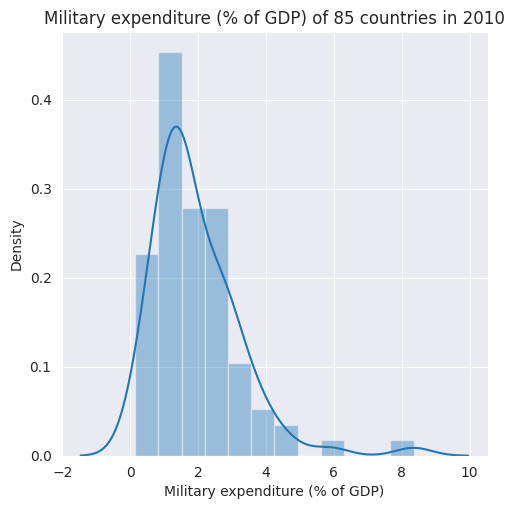

In [23]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(military_exp_np, norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010');
plt.xlabel("Military expenditure (% of GDP)");

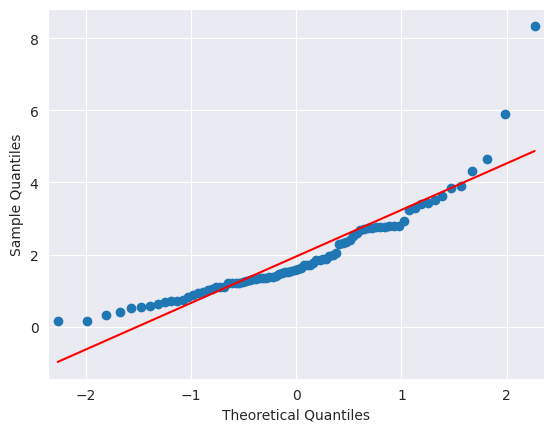

In [24]:
from statsmodels.graphics.gofplots import qqplot
qqplot(military_exp_np, line='s');

**`Prueba de Shapiro-Wilk y Kolmogorov-Smirnov`**

- La prueba de `Shapiro-Wilk` evalúa una muestra de datos y cuantifica la ***probabilidad de que los datos procedan de una distribución gaussiana***, en honor a `Samuel Shapiro` y `Martin Wilk`. En la práctica, se cree que la prueba de `Shapiro-Wilk` es una prueba fiable de normalidad, aunque hay algunos indicios de que la prueba puede ser adecuada para muestras de datos más pequeñas ($n < 30$), por ejemplo, miles de observaciones o menos.

- El test de `Kolmogorov-Smirnov (KS)` es ***menos afectado por el tamaño muestral*** en comparación con el test de Shapiro-Wilk. Por lo tanto, puede ser ***más apropiado para muestras grandes***, donde el test de Shapiro-Wilk tiende a volverse más conservador. El test de KS es más general y no se limita únicamente a la normalidad. Puede utilizarse para comparar cualquier distribución empírica con una distribución teórica.

- La función `shapiro() SciPy` calcula la prueba de `Shapiro-Wilk` (ver [Shapiro-Wilk test](https://es.wikipedia.org/wiki/Prueba_de_Shapiro%E2%80%93Wilk)) en un conjunto de datos determinado. La función devuelve tanto el estadístico $W$ calculado por la prueba como el $p$-value. A continuación se muestra el ejemplo completo de realización de la prueba de `Shapiro-Wilk` en el conjunto de datos.

$$
\begin{align*}
H_{0}&:\quad\textsf{La variable presenta una distribución normal}\\
H_{1}&:\quad\textsf{La variable presenta una distribución no normal}
\end{align*}
$$

In [25]:
from scipy.stats import shapiro

print('Shapiro-Wilk Test:')
stat, p = shapiro(military_exp_np)
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Shapiro-Wilk Test:
Statistics=0.857023, p=1.646573e-07
Sample does not look Normal (reject H0)


In [26]:
import numpy as np
from scipy import stats

print('Kolmogorov-Smirnov:')
stat, p = stats.kstest(military_exp_np, stats.norm.cdf)
print('Statistics=%.6f, p=%e' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Normal (fail to reject H0)')
else:
 print('Sample does not look Normal (reject H0)')

Kolmogorov-Smirnov:
Statistics=0.659326, p=2.320049e-36
Sample does not look Normal (reject H0)


**`Prueba`** $K^2$ **`de D'Agostino`**

- La prueba $K^2$ de D'Agostino calcula los estadísticos de resumen de los datos, es decir, ***la curtosis y la asimetría, para determinar si la distribución de los datos se aparta de la distribución normal***, llamada así por `Ralph D'Agostino`. La asimetría (`skew`) es una cuantificación del grado en que una distribución se desplaza hacia la izquierda o hacia la derecha, es una ***medida de la asimetría de la distribución***.

- La curtosis (`kurtosis`) ***cuantifica la proporción de la distribución que se encuentra en cierta cola lateral*** (ver {numref}`kurtosis_fig`). Es una prueba estadística de normalidad sencilla y de uso común. La prueba $K^2$ de D'Agostino está disponible a través de la función `SciPy normaltest()` y devuelve el estadístico de la prueba y el $p$-value

```{figure} ./figures/kurtosis.png
:name: kurtosis_fig
:align: center
:scale: 40

Diferentes distribuciones asociadas a multiples valores de `kurtosis`.
```

- D: `Distribución de Laplace` (kurtosis = 3); 
- S: `Distribución hiperbólica secante`, (kurtosis = 2); 
- L: `Distribución logística`, (kurtosis = 1.2); 
- N: `Distribución normal`, (kurtosis = 0); 
- C: `Distribución del coseno elevado`, (kurtosis = -0,593762); 
- W: `Distribución del semicírculo de Wigner`, (kurtosis = -1); 
- U: `Distribución uniforme`, (kurtosis = -1.2).

In [27]:
from scipy.stats import normaltest, kurtosis, skew

stat, p = normaltest(military_exp_np)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
 print('Sample looks Gaussian (fail to reject H0)')
else:
 print('Sample does not look Gaussian (reject H0)')

print('Kurtosis=%.3f'%kurtosis(military_exp_np))
print('Skew=%.3f'%skew(military_exp_np))

Statistics=49.874, p=0.000
Sample does not look Gaussian (reject H0)
Kurtosis=6.122
Skew=1.916


````{admonition} Observación

- `Kurtosis mayor que 0`: Indica una ***distribución `leptocúrtica`***, lo que significa que la distribución tiene ***colas más pesadas*** y es ***más puntiaguda en comparación con una distribución normal***. Esto implica que hay una *mayor concentración de datos alrededor de la media, con valores extremos más frecuentes*.

- `Kurtosis menor que 0`: Indica una ***distribución `platicúrtica`***, lo que significa que la distribución es ***más aplanada*** y tiene ***colas más ligeras en comparación con una distribución normal***. Esto implica que *los datos están más dispersos y hay menos valores en la región de la media, con valores extremos menos frecuentes*.
````

- La figura anterior, también puede realizarse para múltiples variables, a fin de comprender su distribución conjunta. Ilustremos un ***análisis bivariante*** considerando la deuda total de los gobiernos centrales de los países junto con su gasto militar en 2010. 
- La siguiente figura muestra las distribuciones conjuntas de estas variables en forma de ***gráficos de densidad de kernel***. La distribución conjunta bivariante ***no muestra una correlación clara entre*** `'Military expenditures & Debt of central governments in 2010'`

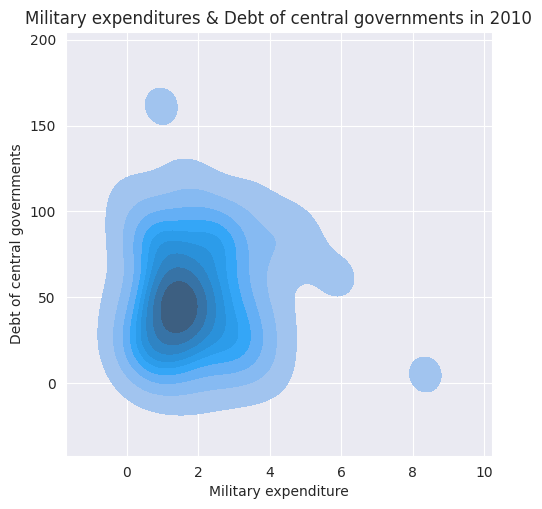

In [28]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot, x = "military_exp", y = "central_govt_debt", fill=True)
g.set_title('Military expenditures & Debt of central governments in 2010');
plt.xlabel("Military expenditure");
plt.ylabel("Debt of central governments");

````{admonition} Observación
:class: tip

- El análisis de datos transversales no se limita al análisis exploratorio y visualización, sino que también ***incluye métodos avanzados como la regresión transversal***, que ajusta modelos entre múltiples variables y una variable dependiente, como en el análisis de pérdida de clientes. 

- La ***regresión logística***, un caso especial de ***modelo lineal generalizado***, se utiliza para ***explicar y predecir la pérdida de clientes, sin depender del tiempo***. En este curso, ***se tratan técnicas de modelado de datos de series temporales, donde el tiempo y la secuencialidad son fundamentales***.
````

## Datos de series temporales

````{admonition} Introducción

- El ejemplo de datos transversales comentado anteriormente ***corresponde únicamente al año 2010***. Sin embargo, en cambio, si consideramos un solo país, por ejemplo Estados Unidos (`USA`), y echamos un vistazo a sus `Federal Military Expenditure`, `Debt of Federal Government`, durante un ***periodo de 10 años, de 2001 a 2010***, obtendríamos dos series temporales:

  - `Federal Military Expenditure`
  - `Debt of Federal Government`

- Por lo tanto, en esencia, ***una serie temporal se compone de observaciones cuantitativas sobre una o más características medibles de una entidad individual y tomadas en múltiples puntos en el tiempo***. En este caso, los datos representan `Federal Military Expenditure`, `Debt of Federal Government`.  
````

- Los datos de series temporales suelen caracterizarse por varias estructuras internas interesantes, como la ***tendencia***, la ***estacionalidad***, ***estacionariedad***, ***autocorrelación***, etc. Las estructuras internas de los datos de series temporales requieren una formulación y técnicas especiales para su análisis. Estas técnicas se tratarán en los siguientes capítulos con estudios de casos e implementación de código de trabajo en `Python`.

- Para generar los gráficos anteriores usaremos el código que se desarrolló para obtener los gráficos para los datos transversales. Comenzaremos creando ***dos nuevas series para representar las series temporales de***  `Federal Military Expenditure` y `Debt of Federal Government`, desde 1960 hasta 2010

In [29]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

- Los dos objetos `Series` creados en el código anterior se fusionan para formar un único `DataFrame` y se cortan para contener los datos de los años 2001 a 2010:

In [30]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head()

,Federal Military Expenditure,Debt of Federal Government
1960,8.35266,NaN
1961,8.487129,NaN
1962,8.656586,NaN
1963,8.189007,NaN
1964,7.467629,NaN


- Podemos utilizar los métodos `isna()` o `isnull()` para ***contabilizar datos faltantes en los datos***. Podemos obtener el total de valores perdidos en cada columna con la función `sum()` o tomar la media con `mean()`. ***Técnicas de imputación de datos faltantes*** pueden ser utilizadas del módulo de [DataViz](https://lihkir.github.io/DataVizPythonRUninorte/common_errors.html#imputacion-multiple-iterativa)

In [31]:
data_us.isna().sum()

Federal Military Expenditure     0
Debt of Federal Government      29
dtype: int64

In [32]:
(data_us.isnull().sum()/len(data_us))*100

Federal Military Expenditure     0.000000
Debt of Federal Government      56.862745
dtype: float64

In [33]:
data_us['backward_fill'] = data_us['Debt of Federal Government'].bfill()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill
1960,8.35266,NaN,39.016963
1961,8.487129,NaN,39.016963
1962,8.656586,NaN,39.016963
1963,8.189007,NaN,39.016963
1964,7.467629,NaN,39.016963


- El método `.bfill()` en `Pandas` se utiliza para ***rellenar los valores faltantes*** (`NaN`) en una `Serie` o `DataFrame` ***hacia atrás*** (`backward fill`). Por ejemplo, si tiene una columna con valores `[1, NaN, 3, NaN, 5]`, al aplicar `.bfill()`, los ***valores faltantes se llenarán con los valores siguientes más cercanos***, dando como resultado `[1, 3, 3, 5, 5]`.

In [34]:
data_us['mean_fill'] = data_us['Debt of Federal Government'].mean()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill
1960,8.35266,NaN,39.016963,51.155537
1961,8.487129,NaN,39.016963,51.155537
1962,8.656586,NaN,39.016963,51.155537
1963,8.189007,NaN,39.016963,51.155537
1964,7.467629,NaN,39.016963,51.155537


In [35]:
data_us['median_fill'] = data_us['Debt of Federal Government'].median()
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404
1961,8.487129,NaN,39.016963,51.155537,47.659404
1962,8.656586,NaN,39.016963,51.155537,47.659404
1963,8.189007,NaN,39.016963,51.155537,47.659404
1964,7.467629,NaN,39.016963,51.155537,47.659404


In [36]:
data_us['quadratic_fill'] = data_us['Debt of Federal Government'].interpolate(option='quadratic')
data_us.head()

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1960,8.35266,NaN,39.016963,51.155537,47.659404,NaN
1961,8.487129,NaN,39.016963,51.155537,47.659404,NaN
1962,8.656586,NaN,39.016963,51.155537,47.659404,NaN
1963,8.189007,NaN,39.016963,51.155537,47.659404,NaN
1964,7.467629,NaN,39.016963,51.155537,47.659404,NaN


- El método `interpolate()` en `Pandas` se utiliza para ***interpolar los valores faltantes*** en una `Serie` o `DataFrame`. Al especificar `option='quadratic'`, está indicando que desea ***utilizar la interpolación cuadrática*** para llenar los valores faltantes.

- Existen otras técnicas de imputación de datos, tales como por ejemplo: [sklearn.impute.KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html), [IterativeImputer](https://lihkir.github.io/DataVizPython/common_errors.html#imputacion-multiple-iterativa), etc.,... Nótese que la columna `quadratic_fill` mantiene los valores `NaN`. Esta técnica ofrece las siguientes versiones de imputación: `'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 'spline', 'barycentric', 'polynomial'` las cuales se le invita a revisar en la documentación. Realice para cada imputación una representación de su nueva distribución e identifique si esta se vio realmente afectada.

- Dado que el cuadro anterior muestra que no se dispone solamente de datos sobre `Debt of Federal Government` de varios años a partir de 1960, y se necesitan las dos dimensiones, ***otra opción es eliminar las filas con datos faltantes*** del `Dataframe`, `data_us` antes de trazar la serie temporal

In [37]:
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 6)


In [38]:
data_us.head(10)

,Federal Military Expenditure,Debt of Federal Government,backward_fill,mean_fill,median_fill,quadratic_fill
1989,5.374717,39.016963,39.016963,51.155537,47.659404,39.016963
1990,5.120252,40.821367,40.821367,51.155537,47.659404,40.821367
1991,4.539845,43.948026,43.948026,51.155537,47.659404,43.948026
1992,4.666265,45.916542,45.916542,51.155537,47.659404,45.916542
1993,4.326925,48.104749,48.104749,51.155537,47.659404,48.104749
1994,3.941287,47.21406,47.214060,51.155537,47.659404,47.21406
1995,3.638489,47.059783,47.059783,51.155537,47.659404,47.059783
1996,3.350744,46.585511,46.585511,51.155537,47.659404,46.585511
1997,3.209903,43.958801,43.958801,51.155537,47.659404,43.958801
1998,3.017636,41.009914,41.009914,51.155537,47.659404,41.009914


- Por último, las ***series temporales*** se generan ejecutando el siguiente código

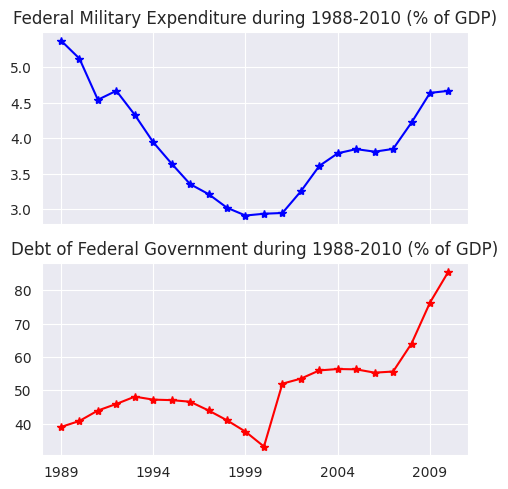

In [39]:
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1]);

## Datos de panel

````{admonition} Introducción
:class: tip

- Hemos visto ***datos transversales (de múltiples individuos en un solo punto en el tiempo)*** y ***series temporales (de una entidad a lo largo de múltiples puntos en el tiempo)***. Si observamos ***múltiples entidades a lo largo de múltiples puntos en el tiempo***, obtenemos un ***panel de datos o datos longitudinales***. 

- Tomando como ejemplo para ***cuatro países*** `'Military expenditure (% of GDP)'` durante el periodo 1960-2010, creamos un ***conjunto de datos de panel***. Ahora, prepararemos los datos para trazar la figura correspondiente, siguiendo un proceso similar al utilizado para los datos transversales y de series temporales en este capítulo.
````

- Preparemos los datos necesarios para trazar la figura correspondiente. Seguiremos el código que hemos utilizado para los datos transversales y de series temporales en este capítulo. Empezaremos creando un ***DataFrame con los datos de las cuatro empresas mencionadas en el gráfico anterior***. Esto se hace de la siguiente manera:

In [40]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='CHN'), :] #China
chn.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
134507,China,CHN,Military expenditure (% of GDP),MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.878156,2.067426,1.896713,1.821927,1.838564,1.872334,1.915341,1.934922,1.922962,NaN


In [41]:
chn = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='CHN'), :].drop(data.columns[range(3)], axis=1)
chn.head()

,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,Unnamed: 61
134507,MS.MIL.XPND.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.878156,2.067426,1.896713,1.821927,1.838564,1.872334,1.915341,1.934922,1.922962,NaN


In [42]:
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)
chn.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1989                       2.499185
1990                       2.555996
1991                       2.407892
1992                       2.518629
dtype: object

In [43]:
usa = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='USA'), :].drop(data.columns[range(3)], axis=1) #USA
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)
usa.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                        8.35266
1961                       8.487129
1962                       8.656586
1963                       8.189007
dtype: object

In [44]:
ind = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='IND'), :].drop(data.columns[range(3)], axis=1) #India
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)
ind.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       1.866015
1961                       1.933365
1962                       2.561202
1963                       3.758057
dtype: object

In [45]:
gbr = data.loc[(data['Indicator Name']=='Military expenditure (% of GDP)') & \
               (data['Country Code']=='GBR'), :].drop(data.columns[range(3)], axis=1) #United Kingdom
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)
gbr.head()

Indicator Code    MS.MIL.XPND.GD.ZS
1960                       6.343041
1961                       6.190022
1962                       6.210394
1963                       6.082126
dtype: object

In [46]:
n_years = chn.shape[0]
print("#Years: ", n_years+1)

#Years:  30


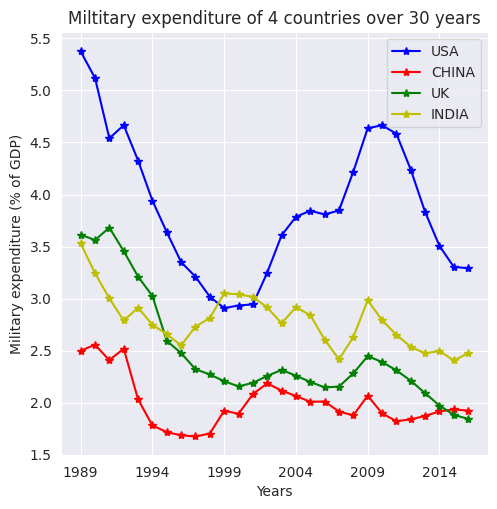

In [47]:
plt.figure(figsize=(5.5, 5.5))
usa[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='b')
chn[1:n_years].plot(linestyle='-', marker='*', color='r')
gbr[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='g')
ind[n_years+1:2*n_years].plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 4 countries over 30 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years');

## Estructuras internas de las series temporales

- En esta sección, explicaremos conceptualmente las siguientes ***características especiales de los datos de series temporales*** que requieren un tratamiento matemático especial

    - **`Tendencia general`**
    - **`Estacionalidad`**
    - **`Movimientos cíclicos`**
    - **`Componentes irregulares`**

- La mayoría de las series temporales ***presentan una o varias de las estructuras internas mencionadas***. Basándose en esta noción, una ***serie temporal puede expresarse como*** 

    $$
    \\[1mm]
    y_{t}=f_{t}+s_{t}+c_{t}+e_{t},
    $$
    
    que es una suma de los componentes de ***tendencia, componentes estacionales, cíclicas e irregulares*** en ese orden. Aquí, $t$ es el ***índice temporal*** en el que observaciones sobre la serie se han tomado en $t = 1,2,3, \dots, T$ ***puntos sucesivos e igualmente espaciados en el tiempo***.

- El objetivo del análisis de series temporales es ***descomponer una serie temporal en sus características constitutivas y desarrollar modelos matemáticos para ellas***. Estos modelos se utilizan para comprender las causas del comportamiento observado de la serie temporal y ***predecirla para momentos futuros***.

## Tendencia general

- Cuando una serie temporal presenta un ***movimiento ascendente o descendente a largo plazo, se dice que tiene tendencia general***. Una forma rápida de comprobar la presencia de una tendencia general es trazar la serie temporal como en la siguiente figura, que muestra las ***concentraciones de CO2 en el aire*** medidas durante 1974 hasta 1987

In [48]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_excel('/home/lihkir/Data/Monthly_CO2_Concentrations.xlsx', converters={'Year': np.int32, 'Month': np.int32})

In [50]:
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


- Creamos índice de filas del `DataFrame` utilizando las columnas `Year` y `Month`

In [51]:
data.index = data['Year'].astype(str) + '-' + data['Month'].astype(str).map(lambda x: '0'+x if len(x) == 1 else x)
data.head()

,CO2,Year,Month
1974-05,333.13,1974,5
1974-06,332.09,1974,6
1974-07,331.10,1974,7
1974-08,329.14,1974,8
1974-09,327.36,1974,9


In [52]:
data = data.loc[(~pd.isnull(data['CO2'])) & \
                (~pd.isnull(data['Year']))& \
                (~pd.isnull(data['Month']))]

In [53]:
data.sort_values(['Year', 'Month'], inplace=True)

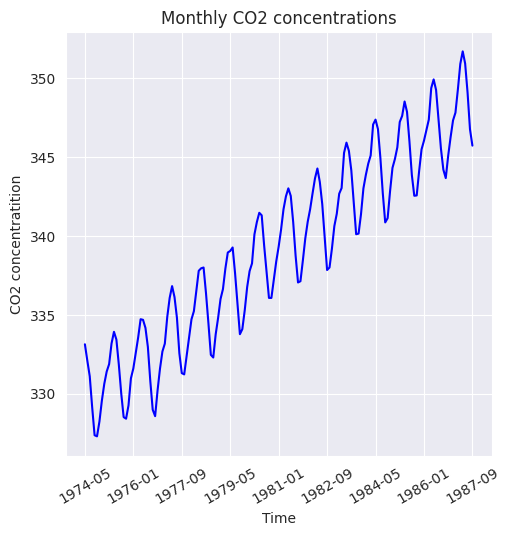

In [54]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

- Nótese que, `pd.infer_freq()` devuelve `"MS"`, lo cual significa que ***la serie de tiempo tiene una frecuencia mensual*** y que ***cada punto de datos representa el primer día de cada mes***

In [55]:
data.index = pd.to_datetime(data.index, format='%Y-%m')
frecuencia = pd.infer_freq(data.index)
print("Frecuencia: ", frecuencia)

Frecuencia:  MS


- Sin embargo, ***la tendencia general puede no ser evidente a corto plazo***. Los efectos a corto plazo como las ***fluctuaciones estacionales*** y las ***variaciones irregulares*** hacen que las series temporales vuelvan a registrar valores más bajos o más altos observados en el pasado, por lo que pueden ***ocultar temporalmente cualquier tendencia general***.

- Esto es evidente en la misma serie temporal de concentraciones de CO2 cuando se considera de 1979 a 1981, como se muestra en la siguiente figura. Por tanto, ***para revelar la tendencia general, necesitamos una serie temporal que se remonte sustancialmente al pasado***.

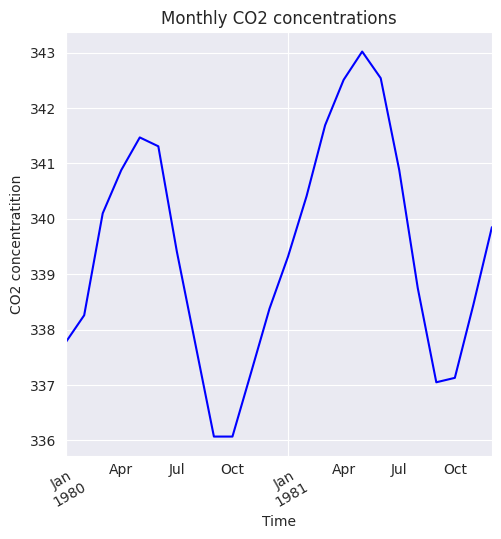

In [56]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

````{admonition} Observación
:class: tip

- La tendencia general de la serie temporal se debe a ***cambios fundamentales o sistémicos del proceso o sistema que representa***. Por ejemplo, el movimiento ascendente de las concentraciones de CO2 entre 1974 y 1987 puede atribuirse al ***aumento gradual de los automóviles y la industrialización durante esos años***.

- La ***tendencia*** de una serie temporal ***se modela comúnmente mediante una regresión respecto al tiempo*** y otras variables conocidas como explicativas. Esta regresión se usa para ***predecir el movimiento a largo plazo de la serie***. Los ***residuos*** de esta regresión ***revelan otras características como la estacionalidad, ciclos y variaciones irregulares***.
````

- A continuación, vamos a ***ajustar la línea de tendencia***. Para ello importamos la clase `LinearRegression` de `scikit-learn` y ajustamos un modelo lineal al índice temporal. Para instalar la librería, utilice la orden

```shell
pip install -U sklearn-learn
```

In [57]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [58]:
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.arange(data.shape[0]).reshape((-1,1)), data['CO2'])

LinearRegression()

In [59]:
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.1209930124223602 and intercept=329.45310559006214


- El ***residual obtenido a partir del modelo de línea de tendencia*** se muestra en la siguiente figura, el cual ***presenta un comportamiento estacional***, el cual se analizará en la siguiente sección. Los residuos se calculan y se representan mediante la siguiente línea de código

In [60]:
residuals = np.array(data['CO2']) - trend_model.predict(np.arange(data.shape[0]).reshape((-1,1)))

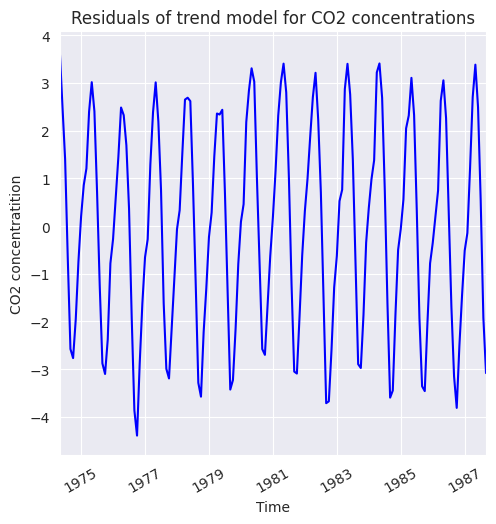

In [61]:
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

## Estacionalidad

````{admonition} Introducción
:class: tip

- La ***estacionalidad muestra variaciones repetitivas y periódicas en una serie temporal***, comúnmente reveladas durante el *análisis exploratorio de datos*. Por ejemplo, las ***fluctuaciones mensuales en las emisiones de CO2*** o en las ***ventas de productos estacionales como los regalos navideños*** evidencian esta estacionalidad.

- Una técnica práctica para ***determinar la estacionalidad*** es el análisis exploratorio de datos mediante los siguientes gráficos:
  
    - ***Gráfico de secuencia de series***
    - ***Gráfico de subseries estacionales***
    - ***Gráficos de cajas múltiples***
````

## Gráfico de secuencia de series

- Un simple ***gráfico de secuencia de ejecución de la serie temporal original*** con el tiempo en el eje $x$ y la variable en el eje $y$ sirve para indicar las siguientes propiedades de la serie temporal:
  
    - ***Movimientos en la media de la serie***
    - ***Cambios en la varianza***
    - ***Presencia de valores atípicos***

- Por ejemplo, el gráfico de la ***secuencia de ejecución de una serie temporal*** hipotética que se obtiene a partir de la formulación matemática 

    $$
    y_{t} = (At + B)\sin(t) + \varepsilon(t)
    $$
    
    con una ***media dependiente del tiempo*** y ***error*** $\varepsilon(t)$ ***que varía como una distribución normal*** $N(0, At + b)$.
  
- En casos como este, un ***gráfico de secuencia de ejecución*** es una forma eficaz de ***identificar el desplazamiento de la media y la varianza de la serie, así como los valores atípicos***. El ***gráfico de la serie temporal sin tendencia es un ejemplo de gráfico de secuencia***.

## Gráfico de subserie estacional

````{admonition} Subseries estacionales

- Para una ***periodicidad conocida de variaciones estacionales***, las ***subseries estacionales vuelven a dibujar la serie original en lotes de períodos sucesivos***. Por ejemplo, la periodicidad de las concentraciones de CO2 es de ***12 meses*** y, basándose en ella, se traza una ***subserie estacional de la media y la desviación estándar de los residuos***.

- ***Para visualizar estacionalidad en los residuos, creamos medias y desviaciones estándar trimestrales***. Una subserie estacional revela dos propiedades:

    - ***Variaciones dentro de las estaciones*** como dentro de un lote de meses sucesivos.
    - ***Variaciones entre las estaciones*** como entre lotes de meses sucesivos
````

- En primer lugar, tenemos que ***añadir los residuos y las etiquetas trimestrales al DataFrame de concentraciones de CO2*** de la siguiente forma

In [62]:
data.head()

,CO2,Year,Month
1974-05-01,333.13,1974,5
1974-06-01,332.09,1974,6
1974-07-01,331.10,1974,7
1974-08-01,329.14,1974,8
1974-09-01,327.36,1974,9


In [63]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',
                     4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3',
                     10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

- A continuación, ***se calculan la media estacional y las desviaciones típicas, agrupando los datos por*** `Year` ***y*** `Quarter`. Esto crea el nuevo `DataFrame` como `seasonal_sub_series_data`, que tiene la media trimestral y las desviaciones estándar a lo largo de los años. Estas columnas se renombran como sigue:

In [64]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std])
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']

- Creamos índices de filas de `seasonal_sub_series_data` utilizando `Year & Quarter`

In [65]:
seasonal_sub_series_data.reset_index(inplace=True)
seasonal_sub_series_data.index = seasonal_sub_series_data['Year'].astype(str) + '-' + seasonal_sub_series_data['Quarter']
seasonal_sub_series_data.head()

,Year,Quarter,Quarterly Mean,Quarterly Standard Deviation
1974-Q2,1974,Q2,3.096398,0.820946
1974-Q3,1974,Q3,-0.616085,1.991671
1974-Q4,1974,Q4,-1.822397,1.014952
1975-Q1,1975,Q1,0.754624,0.511890
1975-Q2,1975,Q2,2.604978,0.355093


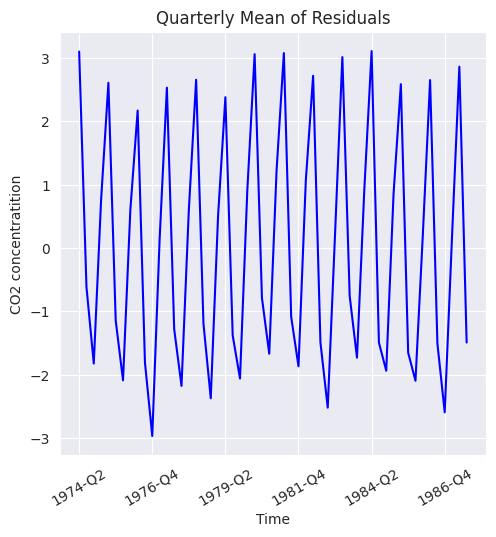

In [66]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

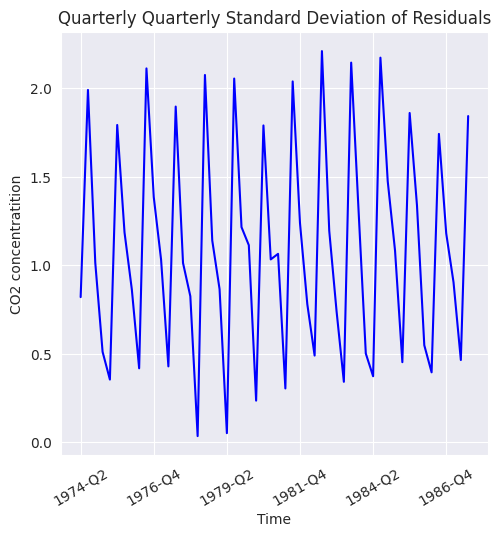

In [67]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Quarterly Standard Deviation of Residuals')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);

## Gráficos de cajas múltiples

````{admonition} Boxplot
:class: tip

- El gráfico de la subserie estacional puede ser más informativo si se redibuja con ***gráficos de caja estacionales*** como se muestra en la siguiente figura.

- Un gráfico de cajas muestra tanto la ***tendencia central*** como la ***dispersión de los datos*** estacionales en un lote de unidades temporales. Además, la ***separación entre dos gráficos de caja adyacentes revela las variaciones dentro de la temporada***
````

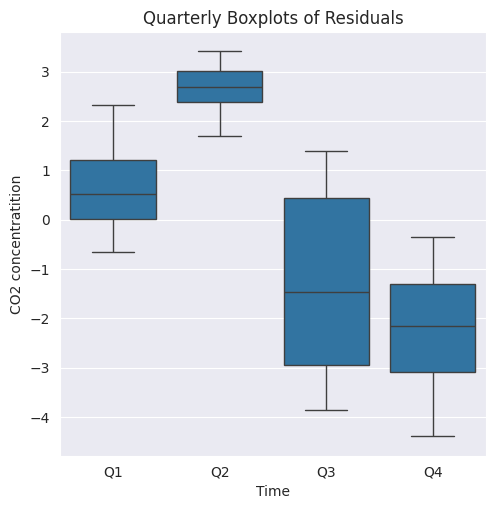

In [68]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=data[data['Year'] > 1974], y='Residuals', x='Quarter')
g.set_title('Quarterly Boxplots of Residuals')
g.set_xlabel('Time')
g.set_ylabel('CO2 concentratition');

## Cambios cíclicos

````{admonition} Cambios cíclicos

- Los cambios cíclicos son ***movimientos que se observan cada pocas unidades de tiempo***, menos frecuentes que las fluctuaciones estacionales, ***pueden no tener un período fijo*** y suelen ***ocurrir cada pocos años***. Se necesitan ***datos a largo plazo para identificarlos***, como los ciclos económicos recurrentes.
````

- La inflación del ***CPI en India y Estados Unidos*** ([consumer price index (CPI)](https://en.wikipedia.org/wiki/Consumer_price_index)) muestra patrones cíclicos cada 2-2.5 años. Los datos se obtuvieron de `datamarket`.

In [69]:
inflation = pd.read_excel('/home/lihkir/Data/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])

In [70]:
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


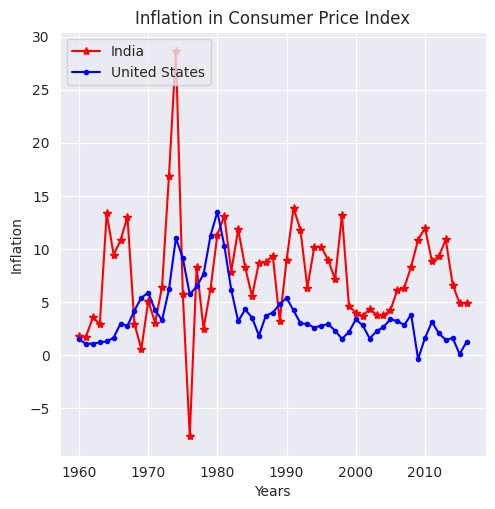

In [71]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2)
plt.title('Inflation in Consumer Price Index')
plt.ylabel('Inflation')
plt.xlabel('Years');

- La ***alta inflación en Estados Unidos e India entre 1970 y 1980*** se debió principalmente a los ***aumentos en los precios del petróleo*** a nivel mundial, ***políticas económicas expansivas*** y ***presión sobre los precios por aumento de la demanda*** debido al rápido crecimiento económico.

## Componentes irregulares

````{admonition} Variaciones irregulares
- A pesar de que nuestro modelo que ***incluye cuatro componentes para expresar una serie temporal***, aún puede haber un ***componente irregular***. Este componente es un ***error irreducible que es aleatorio y no muestra una relación sistemática con el tiempo***.

- Refleja ***variaciones inesperadas en la serie temporal que son estocásticas*** y no pueden predecirse definitivamente con un modelo matemático, debido a la falta de información sobre variables explicativas o la presencia de ruido aleatorio.
````

## Modelos de análisis de series temporales

````{admonition} Introducción
:class: tip

- El objetivo del análisis de series temporales es ***desarrollar un modelo matemático que pueda explicar el comportamiento observado de una serie temporal y, posiblemente, predecir su estado futuro***.

- El modelo elegido debe ser capaz de dar cuenta de una o más de las estructuras internas que pueden estar presentes. Con este fin, daremos una ***visión general*** de los siguientes modelos que se utilizan a menudo como ***componentes básicos del análisis de series temporales***:

    - ***Modelos de media cero***
    - ***Recorrido aleatorio***
    - ***Modelos de tendencia***
    - ***Modelos de estacionalidad***
````

## Modelos de media cero

````{admonition} Definición
:class: tip

- Los ***modelos de media cero tienen una media y una varianza constantes y no muestran tendencias predecibles ni estacionalidad***. Se supone que las observaciones de un modelo de media cero son ***independientes e idénticamente distribuidas (iid)*** y representan el ***ruido aleatorio en torno a una media fija***, que se ha deducido de la serie temporal como un término constante.
````

- Consideremos que $Y_{1}, Y_{2},\dots, Y_{T}$ representan las ***variables aleatorias correspondientes a*** $T$ ***observaciones*** de un modelo de media cero. Si $y_{1}, y_{2},\dots, y_{T}$ son $t$ observaciones de la serie temporal de media cero, la ***distribución conjunta de las observaciones*** viene dada por el producto de las funciones de masa de probabilidad para cada índice temporal

$$
P(Y_{1}=y_{1}, Y_{2}=y_{2}, \dots, Y_{T}=y_{T})=f(Y_{1}=y_{1})f(Y_{2}=y_{2})\cdots f(Y_{T}=y_{T}) 
$$

- Lo más habitual es ***modelar*** $f(Y_{t} = y_{t})$ ***mediante una distribución normal de media cero y varianza*** $\sigma^2$, que se supone que es el ***error irreducible del modelo y, por tanto, se trata como un ruido aleatorio***. La siguiente figura muestra una serie de ruido aleatorio con media cero y distribución normal de varianza unitaria

In [72]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [73]:
np.random.seed(42)
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

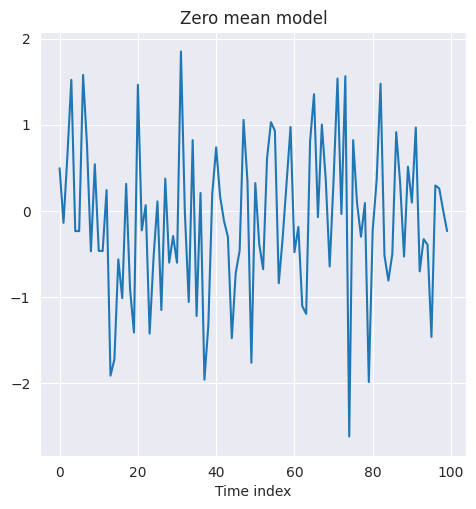

In [74]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(zero_mean_series)
g.set_title('Zero mean model')
g.set_xlabel('Time index');

- ***La media cero con varianza constante representa un ruido aleatorio*** que puede asumir infinitos posibles valores reales y es adecuado para ***representar variaciones irregulares en la serie temporal de una variable continua***.

- Sin embargo, en muchos casos, el estado observable del sistema o proceso puede ser de ***naturaleza discreta y limitarse a un número finito de valores posibles*** $s_{1}, s_{2}, \dots, s_{m}$. En tales casos, se supone que la ***variable observada*** $X$ ***obedece a la*** [distribución multinomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_multinomial),

  $$
  P(X = s_{1}) = p_{1}, P(X = s_{2}) = p_{2}, \dots, P(X = s_{m}) = p_{m}~\text{tal que}~p_{1} + p_{2} + \cdots + p_{m} = 1.
  $$

  Una serie temporal de este tipo es un ***proceso estocástico discreto***.

- El ***lanzamiento múltiple de un dado a lo largo del tiempo es un ejemplo de proceso estocástico discreto*** con seis resultados posibles para cada lanzamiento. Un proceso estocástico discreto más sencillo es un proceso binario como lanzar una moneda con solo dos resultados: cara y sello.

## Camino aleatorio

````{admonition} Definición
:class: tip

- Un paseo aleatorio viene dado como una ***suma de*** $n$ ***iids, que tiene media cero y varianza constante***. A partir de esta definición, la ***realización de un paseo aleatorio en el índice de tiempo*** $t$ viene dada por la suma

  $$
  S = y_{1} + y_{2} + \cdots + y_{T}.
  $$
````

- La siguiente figura muestra el paseo aleatorio obtenido a partir de las *iids*, que varían según una ***distribución normal de media cero y varianza unitaria***.

- El paseo aleatorio es importante porque si se encuentra un comportamiento de este tipo en una serie temporal, ***se puede fácilmente reducir a un modelo de media cero tomando las diferencias de las observaciones de dos índices temporales consecutivos como***

  $$
  S_{t}-S_{t-1} = y_{t}
  $$

  obteniendo así una ***serie iid con media cero y varianza constante***.

- El paseo aleatorio puede generarse tomando la ***suma acumulada del modelo de media cero discutido en la sección anterior***. El siguiente código lo implementa

In [75]:
random_walk = np.cumsum(zero_mean_series)

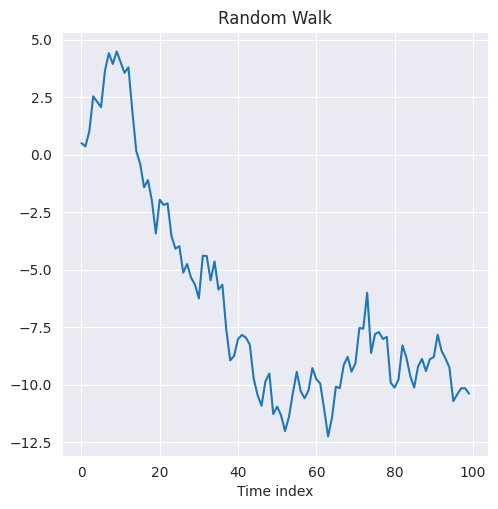

In [76]:
plt.figure(figsize=(5.5, 5.5))
g = sns.lineplot(random_walk)
g.set_title('Random Walk')
g.set_xlabel('Time index');

## Modelos de tendencia

````{admonition} Introducción
:class: tip

- Este tipo de modelo pretende ***captar la tendencia a largo plazo de la serie temporal que puede ajustarse como regresión lineal del índice temporal***. Cuando la serie temporal no presenta fluctuaciones periódicas o estacionales, puede expresarse simplemente como la suma de la tendencia y la media nula como

  $$
  y_{t} = \mu(t) + \varepsilon_{t}
  $$

  donde $\mu(t)$ es la ***tendencia a largo plazo*** dependiente del tiempo de la serie.

- La elección del modelo de tendencia $\mu(t)$ es fundamental para ***captar correctamente el comportamiento de la serie temporal***. El análisis exploratorio de datos suele proporcionar pistas para plantear la hipótesis de si el modelo debería ser lineal o no lineal en $t$. 

- Un ***modelo lineal es simplemente*** $\mu(t) = wt + b$, mientras que un ***modelo cuadrático es*** $\mu(t) = w_{1}t + w_{2}t^{2} + b$. A veces, la tendencia se puede hipotetizar mediante una relación compleja en términos del índice temporal, como $\mu(t) = w_{0}t^{p} + b$ o $\mu(t)=w_{0}e^{w_{1}t}$.
````

- Los pesos y sesgos en los modos de tendencia como los discutidos anteriormente se obtienen ejecutando una ***regresión con*** $t$ ***como variable explicativa y*** $\mu(t)$ ***como respuesta***. Los ***residuos*** $y_{t} - \mu(t)$ del modelo de tendencia es considerado el ***ruido irreducible*** y como realización del componente de media cero $\varepsilon_{t}$.

## Modelos de estacionalidad

````{admonition} Definición
:class: tip

- La estacionalidad se manifiesta como ***fluctuaciones periódicas y repetitivas en una serie temporal*** y, por tanto, se ***modelan como una suma ponderada de ondas senoidales de periodicidad conocida***. 

- Suponiendo que la tendencia a largo plazo se ha eliminado mediante una línea de tendencia, el ***modelo de estacionalidad puede expresarse como*** $y_{t} = s_{t}+ \varepsilon_{t}$, donde la variación estacional es

    $$
    s_{t}=\sum_{k=1}^{L}(w_{k}\cos(\alpha t)+v_{k}\sin(\alpha t))+b,
    $$
    
    con periocidad $\alpha$.
````

- Los modelos de estacionalidad también se conocen como ****modelos de regresión armónica****, ya que intentan ajustar la suma de múltiples ondas senoidales. ***Los cuatro modelos descritos aquí son los componentes básicos de un modelo de series temporales completo***.

````{admonition} Observación

- Como ya se habrá dado cuenta, un modelo de suma cero representa el error irreducible del sistema y los otros tres modelos pretenden transformar una serie temporal dada en modelos de suma cero mediante transformaciones matemáticas adecuadas. ***Para obtener previsiones en series temporales originales, se aplican las transformaciones inversas pertinentes***.
````

- ***En las próximas secciones se detallarán los cuatro modelos aquí analizados***. Sin embargo, hemos llegado a un punto en el que podemos resumir el enfoque genérico de un análisis de series temporales en los siguientes cuatro pasos:

    - ***Visualizar los datos en distintas etapas del índice temporal*** para revelar las tendencias a largo plazo y las fluctuaciones estacionales.
    - ***Ajustar la línea de tendencia para captar tendencias a largo plazo*** y trazar los residuos para comprobar si hay estacionalidad o error irreducible
    - ***Ajustar de un modelo de regresión armónica para captar la estacionalidad***
    - ***Trazar los residuos*** dejados por el modelo de estacionalidad para ***comprobar si hay error irreducible***.

- Estos pasos suelen bastar para ***desarrollar modelos matemáticos para la mayoría de las series temporales***. Los modelos individuales de tendencia y estacionalidad pueden ser sencillos o complejos, dependiendo de la serie temporal original y de la aplicación.

## Autocorrelación y autocorrelación parcial

````{admonition} Introducción
:class: tip

- Tras aplicar las transformaciones matemáticas comentadas en el apartado anterior, a menudo nos encontramos con lo que se conoce como una ***serie temporal estacionaria*** (o ***débilmente estacionaria***), que se caracteriza por una ***media constante*** $\text{E}(y_{t})$ y una ***correlación que solo depende del desfase entre dos pasos temporales, pero independiente del valor del paso temporal***, esto es, *su distribución de probabilidad es completamente independiente del tiempo*.
````

- Este tipo de covarianza es la clave en el análisis de series temporales y se denomina autocovarianza o autocorrelación, cuando se normaliza en el intervalo de -1 a 1. La ***autocorrelación refleja el grado de dependencia lineal entre la serie temporal en el índice*** $t$ ***y las series temporales de los índices*** $t-k$ o $t+k$.

- Una ***autocorrelación positiva*** indica que los ***valores presentes y futuros de la serie temporal se mueven en la misma dirección***, mientras que los ***valores negativos*** significan que los ***valores presentes y futuros se mueven en sentido contrario***. Si la ***autocorrelación es cercana a cero***, las ***dependencias temporales dentro de la serie pueden ser difíciles de encontrar***. Debido a esta propiedad, la autocorrelación es útil para predecir el estado futuro de una serie temporal a $h$ pasos por delante.

````{admonition} Definición

- La ***covarianza*** entre $y_{t}$ y su valor en otro período de tiempo, digamos, $y_{t+k}$ se denomina ***autocovarianza en el desfase (lag)*** $k$ y se define como

$$
\gamma_{k}=\textsf{Cov}(y_{t}, y_{t+k})=\textsf{E}[(y_{t}-\mu)(y_{t+k}-\mu)].
$$

- La colección de los valores de $\gamma_{k}, k = 0, 1, 2,\dots$ se denomina ***función de autocovarianza***. Tenga en cuenta que la autocovarianza en el lag $k = 0$ es solo la ***varianza*** de la serie temporal; es decir, $\gamma_{0}=\sigma_{y}^{2}$, que es ***constante para una serie de tiempo estacionaria***.

- El ***coeficiente de autocorrelación*** en el lag $k$ para una serie temporal estacionaria es

$$
\rho_{k}=\frac{\textsf{E}[(y_{t}-\mu)(y_{t+k}-\mu)]}{\sqrt{\textsf{E}[(y_{t}-\mu)^2]\textsf{E}[(y_{t+k}-\mu)^{2}]}}=\frac{\textsf{Cov}(y_{t}, y_{t+k})}{\textsf{Var}(y_{t})}=\frac{\gamma_{k}}{\gamma_{0}}.
$$

- El conjunto de los valores de $\rho_{k}, k = 0, 1, 2, \dots$ se denomina ***función de autocorrelación (ACF)***. Obsérvese que, por definición, $\rho_{0} = 1$. Además, la ***ACF*** es independiente de la escala de medición de la serie temporal, por lo que ***es una cantidad adimensional***. Adicionalmente, $\rho_{k} = \rho_{-k}$***; es decir, la ACF es simétrica en torno a cero***, por lo que solo es necesario calcular la mitad positiva (o negativa).

- Es necesario estimar la ***autocovarianza*** y los ***ACF*** a partir de una serie temporal de longitud finita, digamos, $y_{1}, y_{2}, \dots, y_{T}$. La estimación habitual de la función de autocovarianza es

    $$
    \\[1mm]
    c_{k}=\hat{\gamma}_{k}=\frac{1}{T}\sum_{t=1}^{T-k}(y_{t}-\overline{y})(y_{t+k}-\overline{y}),\quad k=1,2,\dots,K,
    $$
    
    y la ***ACF*** es estimada por la ***función de autocorrelación muestral*** (o ***ACF muestral***)
    
    $$
    \\[1mm]
    r_{k}=\hat{\rho}_{k}=\frac{c_{k}}{c_{0}},\quad k=0,1,2,\dots,K.
    $$
````

- El siguiente ***tutorial*** puede ser de utilidad para quienes gozan usar ***`Excel`***. En esta oportunidad puede ser usado como ***calculadora para obtener de forma manual la función ACF*** (ver [How to calculate ACF by 2 ways in Excel](https://www.youtube.com/watch?v=H3iHEJkh3A8&ab_channel=Sangwoo.StatisticsKim))

````{admonition} Observación
:class: tip

- Una buena regla general es que ***se necesitan al menos 50 observaciones*** para obtener una estimación fiable de la ***ACF***, y las ***autocorrelaciones de las muestras*** individuales ***deben calcularse hasta el retardo*** $K$, donde $K$ ***es aproximadamente*** $T/4$.

- A menudo tendremos que ***determinar si el coeficiente de autocorrelación en un determinado retardo es cero***. Esto puede hacerse comparando el coeficiente de autocorrelación de la muestra en el retardo $k, r_{k}$, con su error estándar. 

- Sí, suponemos que las observaciones no están correlacionadas, es decir, $\rho_{k} = 0$ para todo $k$, entonces ***la varianza del coeficiente de autocorrelación de la muestra*** es (ver {cite}`bartlett1946theoretical`)

    $$
    \\[1mm]
    \textsf{Var}(r_{k})\cong\frac{1}{T},
    $$
    
    y ***error estándar*** es
    
    $$
    \textsf{se}(r_{k})\cong\frac{1}{\sqrt{T}}.
    $$
````

- Para abordar el cálculo de este error, ***Bartlett*** considera el ***proceso estocástico discreto AR*** $y_{t+1}=\phi y_{t}+\varepsilon_{t+1}$. Para este propósito, utiliza la siguiente expresión para la ***varianza aproximada del coeficiente de autocorrelación*** estimado de un proceso normal estacionario dada por

$$
\textsf{Var}(r_{k})\cong\frac{1}{T}\sum_{v=-\infty}^{\infty}(\rho_{v}^{2}+\rho_{v+k}\rho_{v-k}-4\rho_{k}\rho_{v}\rho_{v-k}+2\rho_{v}^{2}\rho_{k}^{2}).
$$ (error_variance_acf)

- Por ejemplo, si $\rho_{k}=\phi^{|k|},~(-1<\phi<1)$, es decir, la función de ***autocorrelación se reduce exponencialmente***, entonces la Ecuación {eq}`error_variance_acf` se convierte en (**`verifíquelo`**)

    
$$
\textsf{Var}(r_{k})\cong\frac{1}{T}\left(1+2\sum_{v=1}^{q}\rho_{v}^{2}\right),\quad k>q.
$$
    
- Bajo el supuesto de que los $\rho_{k}$ ***son todos cero más allá de un cierto rezago*** $k =q$, el error estándar de gran retardo se aproxima a la desviación estándar de $r_{k}$ para retardos adecuadamente grandes $(k > q)$. Entonces los ***errores estándar para las autocorrelaciones estimadas*** $r_{k}$ adoptan la forma simple (***`bonus`***)

$$
\textsf{se}(r_{k})\approx\frac{1}{\sqrt{T}}.
$$

## Experimentos numéricos ACF

- La presencia de autocorrelación puede identificarse ***trazando los valores observados de la función de autocorrelación (ACF) de una serie temporal determinada***. Este gráfico suele denominarse `ACF`. Ilustremos cómo el trazado de los valores observados de la `ACF` puede ayudar a ***detectar la presencia de autocorrelación***.

- Para ello, trazaremos primero el valor diario del [Dow Jones Industrial Average (DJIA)](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average) ***observado durante enero de 2016 a diciembre de 2016***

In [77]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [78]:
djia_df = pd.read_excel('/home/lihkir/Data/DJIA_Jan2016_Dec2016.xlsx')

In [79]:
djia_df.index = djia_df['Date']
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2016-01-04,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


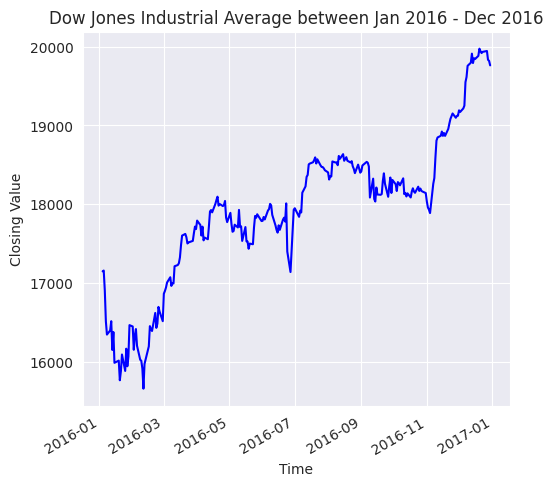

In [80]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time')
plt.ylabel('Closing Value');

- De la figura anterior se desprende que ***cuando el DJIA empieza a subir, continúa haciéndolo durante algún tiempo y viceversa***. Sin embargo, debemos ***comprobarlo mediante un gráfico ACF***.

- A continuación, se ***estima la ACF calculando la autocorrelación para diferentes valores del retardo*** $h$, que *en este caso varía de 0 a 30*. La función `Pandas.Series.autocorr` ***se utiliza para calcular la autocorrelación*** para diferentes valores del retardo

In [81]:
lag = range(0,31)
djia_acf = []
for l in lag:
    djia_acf.append(djia_df['Close'].autocorr(l))

- El código anterior, itera sobre una ***lista de 31 valores de lag, empezando de 0 a 30***. Un ***rezago de 0*** índica autocorrelación de una observación consigo misma ($\text{Cov}(y_{t}, y_{t})/\text{Var}(y_{t})$) y, por lo tanto, ***se espera que sea 1.0***, como también se confirma en la figura siguiente.

- Autocorrelación en `DJIA Close` ***parece disminuir linealmente con el retardo, con un cambio aparente en la tasa de caída en torno a los 18 días***. Con un desfase de 30 días, la ACF es ligeramente superior a 0.65.

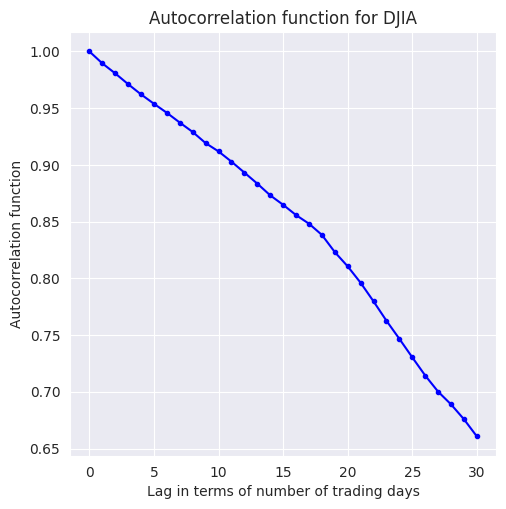

In [82]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='.', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function');

- El gráfico ACF muestra que la autocorrelación, en el caso de los valores de cierre del *DJIA*, tienen una ***dependencia funcional del desfase temporal entre las observaciones***. Hemos escrito un bucle for para calcular la autocorrelación en distintos retardos y hemos representado los resultados mediante la función `sns.pointplot`. También se puede utilizar la función `plot_acf` de `statsmodels.graphics.tsaplots` ***para calcular y trazar la autocorrelación en varios rezagos***.

- Además, esta función también traza los intervalos de confianza del 95%. ***La autocorrelación fuera de estos intervalos de confianza es una correlación estadísticamente significativa, mientras que las que están dentro de los intervalos de confianza se deben a ruido aleatorio***. La autocorrelación y los intervalos de confianza generados por `plot_acf` se muestran en la figura siguiente:

<Figure size 550x550 with 0 Axes>

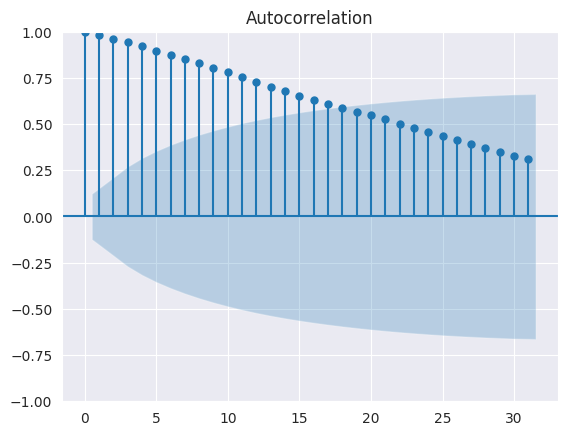

In [83]:
plt.figure(figsize=(5.5, 5.5));
plot_acf(djia_df['Close'], lags=31);

- Hasta ahora hemos hablado de la ***autocorrelación, que es una medida de la dependencia lineal entre las variables*** $y_{t}$ y $y_{t+k}$. Los ***modelos autorregresivos (AR) captan esta dependencia como una regresión lineal entre*** $y_{t+k}$ y $y_{t}$. Sin embargo, las series temporales tienden a llevar información y estructuras de dependencia por etapas, por lo que ***la autocorrelación en el rezago*** $k$ ***también se ve influida por las variables intermedias*** $y_t, y_{t+1}, \dots, y_{t+k-1}$. Por lo tanto, la autocorrelación no es la medida correcta de la correlación mutua entre $y_{t}$ y $y_{t+k}$ en presencia de las variables intermedias. 

- Sería ***erróneo elegir*** $k$ ***en modelos AR basados en autocorrelación***. La ***autocorrelación parcial (PACF) resuelve este problema*** midiendo la correlación entre $y_{t}$ y $y_{t+k}$ cuando se ha eliminado la influencia de las variables intermedias. Por lo tanto, ***la autocorrelación parcial en el análisis de series temporales define la correlación entre*** $y_{t}$ ***y*** $y_{t+k}$ ***que no tiene en cuenta los retardos*** $t+1, \dots, t+k-1$. La ***PACF ayuda a identificar el orden*** $p$ ***de un modelo*** $AR(p)$. Veamos la autocorrelación parcial de los valores de cierre del `DJIA` utilizando `plot_pacf` como sigue

<Figure size 550x550 with 0 Axes>

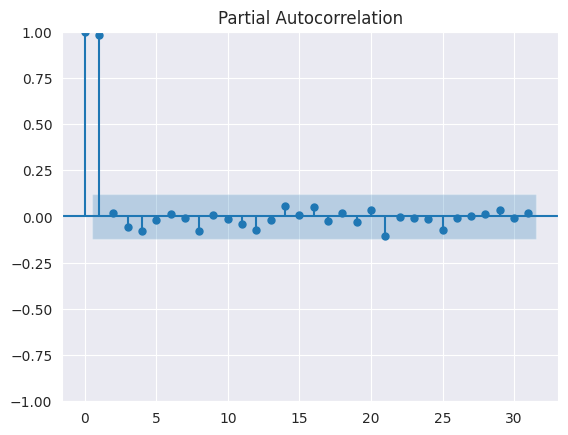

In [84]:
plt.figure(figsize=(5.5, 5.5));
plot_pacf(djia_df['Close'], lags=31);

- La primera ***autocorrelación parcial en el retardo cero es siempre 1.0***. Como se observa en el gráfico anterior, la ***autocorrelación parcial solo en el retardo uno es estadísticamente significativa***, mientras que para el resto de los rezagos está dentro de los intervalos de confianza del 95%. Por lo tanto, para los valores de cierre del `DJIA` el ***orden de los modelos*** $AR$ ***es uno*** (usar $AR(1)$).

## Análisis de datos de series temporales

````{admonition} Observación

- El ***análisis de series temporales*** implica dos pasos clave: ***visualizar los datos para identificar tendencias y patrones, y ajustar estas tendencias y estacionalidades para crear series estacionarias***. Las ***fluctuaciones irregulares restantes se modelan como observaciones independientes e idénticamente distribuidas (iid) mediante regresión lineal*** sobre variables exógenas.

- Este enfoque mejora las predicciones futuras. La metodología se presenta en un diagrama de flujo y se cubren los primeros tres pasos, incluyendo ***procesamiento avanzado de datos, pruebas estadísticas para estacionariedad y descomposición de series temporales***. Estos conceptos son fundamentales para desarrollar modelos predictivos de series temporales.
````

```{figure} ./figures/fig1_chapter1.png
:name: fig1_chapter1
:align: center
:scale: 80
```

## Procesamiento avanzado y visualización de datos de series temporales

````{admonition} Introducción
:class: tip

- Las ***series temporales suelen transformarse en estadísticos agregados*** como la ***media o la mediana para períodos de tiempo más largos***. Por ejemplo, en ventas mensuales de automóviles, la estacionalidad mensual se resalta al calcular ***promedios para cada mes a lo largo de varios años***. Esto se logra dividiendo la serie en segmentos mensuales y agregando los datos de cada segmento.

- Para un análisis más detallado, a menudo se utilizan ***agregados móviles, como medias trimestrales***, que ***se calculan desplazando una ventana de tiempo sobre la serie y calculando estadísticos dentro de esa ventana***. Esto se demuestra con ejemplos de ***remuestreo, agrupación y cálculo de estadísticos móviles*** utilizando librerías de `pandas`.
````

## Remuestreo de datos de series temporales

- La técnica de ***remuestreo*** se ilustra utilizando una ***serie temporal sobre concentraciones químicas tomadas cada dos horas entre el 1 de enero de 1975 y el 17 de enero de 1975***. El conjunto de datos se ha descargado de [datamarket](http://datamarket.com).

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

- A continuación se leen los datos del archivo `CSV` en un `pandas.DataFrame` y mostramos las primeras filas del `DataFrame`

In [86]:
df = pd.read_csv('/home/lihkir/Data/chemical-concentration-readings.csv')
print('Shape of the dataset:', df.shape)
df.head()

Shape of the dataset: (197, 2)


,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1


- ***Convertiremos*** las observaciones de la ***serie temporal original en medias diarias*** aplicando las funciones de remuestreo y media en la segunda columna. La función de remuestreo requiere que los índices de fila del `DataFrame` sean `timestamp` de tipo `numpy.datetime64`.

- Por lo tanto, ***cambiamos los índices de fila de números enteros, como se muestra en la tabla anterior, a*** `datetime_rowid` que es una `pandas.Series` de objetos `numpy.datetime64`. 

- Los objetos `numpy.datetime64` se generan a partir de la columna `Timestamp` utilizando la función de utilidad `pd.todatetime`. El siguiente código muestra cómo se realiza la reindexación por filas

In [87]:
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head()

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1


- Ahora estamos listos para aplicar las funciones de `resample` y `mean` en la columna `Chemical conc.`

In [88]:
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

- Observe que hemos pasado el ***argumento*** `D` a la función `resample` ***para generar las medias diarias***. Para los agregados mensuales y anuales, tenemos que pasar `M` e `Y` a la función `resample`. Por último, ***las medias originales y diarias se representan en la siguiente figura***, que muestra el efecto de suavización de esta última.

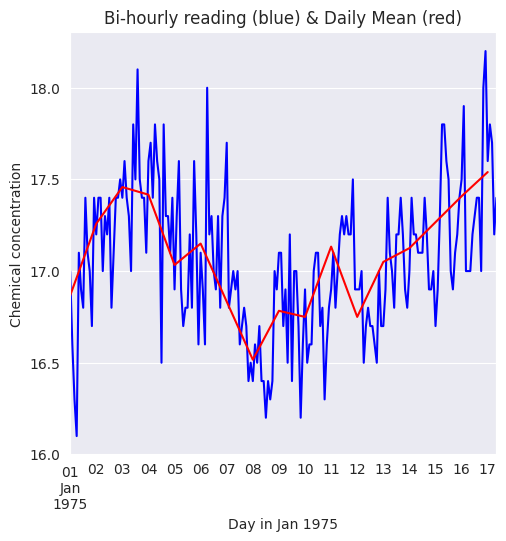

In [89]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')
ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)');
ax.set_xlabel('Day in Jan 1975');
ax.set_ylabel('Chemical concentration');

## Agregación por grupos

- Para demostrar la ***agregación por grupos***, utilizaremos la ***serie temporal de la temperatura media diaria del río Fisher en Texas, Estados Unidos***. La serie temporal tiene observaciones tomadas ***entre el 1 de enero de 1988 y el 31 de diciembre de 1991***.

In [90]:
df = pd.read_csv('/home/lihkir/Data/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [91]:
print('Shape of dataframe:', df.shape)
df.head()

Shape of dataframe: (1461, 2)


,Date,Mean temperature
Date,,
1988-01-01,1988-01-01,-23.0
1988-01-02,1988-01-02,-20.5
1988-01-03,1988-01-03,-22.0
1988-01-04,1988-01-04,-30.5
1988-01-05,1988-01-05,-31.0


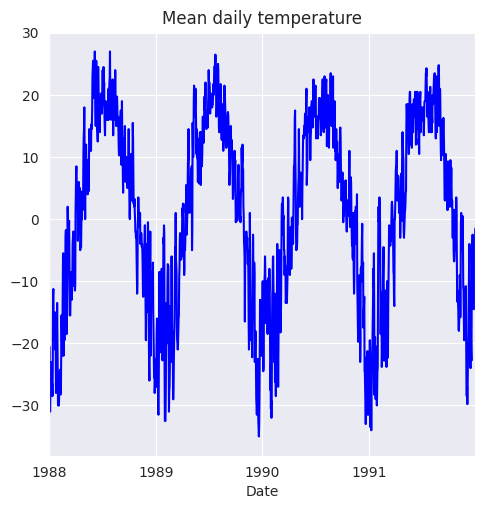

In [92]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
df['Mean temperature'].plot(ax=ax, color='b')
ax.set_title('Mean daily temperature');

- ***La serie temporal original parece tener patrones mensuales que se repiten cada año*** y que pueden verificarse calculando los promedios mensuales. Esto se hace ***agrupando los datos en 12 meses y luego calculando los promedios de cada mes***. Comenzamos agregando una columna `Month_Year` al `DataFrame`

In [93]:
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))
df.head()

,Date,Mean temperature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.0,01-1988
1988-01-02,1988-01-02,-20.5,01-1988
1988-01-03,1988-01-03,-22.0,01-1988
1988-01-04,1988-01-04,-30.5,01-1988
1988-01-05,1988-01-05,-31.0,01-1988


- A continuación, la columna `Mean temperature` se agrupa con respecto a la nueva columna `Month_Year` y ***se calculan la media, la mediana y las desviaciones estándar de cada mes***

In [94]:
monthly_stats = df.groupby(by='Month_Year')['Mean temperature'].aggregate([np.mean, np.median, np.std])
monthly_stats.reset_index(inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.0,5.260640
1,01-1989,-17.129032,-18.0,8.250725
2,01-1990,-15.112903,-12.0,6.606764
3,01-1991,-23.038710,-24.5,7.095570
4,02-1988,-19.025862,-19.5,8.598522


- Tenga en cuenta que las filas de la tabla anterior no están en orden ascendente de `Month_Year`. Por lo tanto, es necesario registrarlo. Esto se hace creando dos nuevas columnas `Month` y `Year` y, a continuación, ***ordenando en orden ascendente*** `Year`, ***seguido de la ordenación en orden ascendente de*** `Month`

In [95]:
monthly_stats['Year'] = monthly_stats['Month_Year']\
.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))

monthly_stats['Month'] = monthly_stats['Month_Year']\
.map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))

monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05


- Los agregados mensuales se representan en la siguiente figura, que pone de manifiesto la ***estacionalidad mensual*** existente en los datos originales.

In [96]:
monthly_stats.index = monthly_stats['Month_Year']

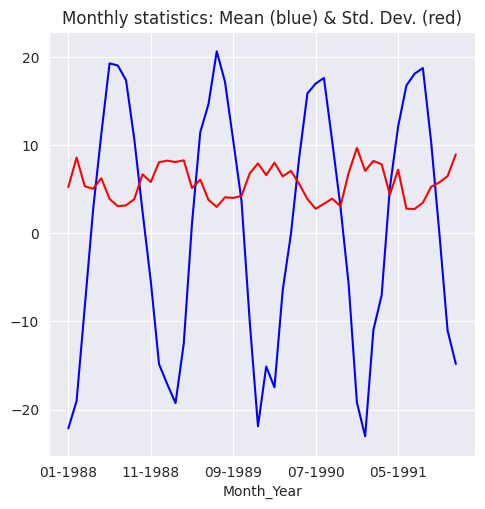

In [97]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)');

## Estadísticos móviles

````{admonition} Introducción
:class: tip

- Los ***estadísticos móviles o rodantes*** se calculan ***desplazando una ventana sobre la serie temporal original*** y agregando los datos de cada ventana. Los ***parámetros clave son el tamaño de la ventana y la longitud del paso***, que definen la entrada y el intervalo para cada cálculo.

- Por ejemplo, supongamos que se utiliza un ***tamaño de ventana de*** $k$ y un ***intervalo de longitud*** $l$ para calcular la función $f$ sobre una serie temporal $y_{1}, y_{2},\dots, y_{T}$ con $T$ observaciones. En este caso, el estadístico móvil se obtiene como $f(y_{1}, y_{2},\dots, y_{k}), f(y_{1+l}, y_{2+l},\dots, y_{k+l})$, y así sucesivamente. 

- Obsérvese que ***cada vez se calcula la función desplazando la ventana temporal hacia la derecha*** en $l$ ***unidades de tiempo***. La ***media móvil es un caso especial de la función*** $f$ y requiere simplemente promediar las observaciones en la ventana de tiempo.
````

- Vamos a demostrar cómo se pueden ***calcular las medias móviles en el conjunto de datos de Fisher River***. Calcularemos las medias móviles semanales, fijando el ***tamaño de la ventana en siete y deslizando la ventana un lugar a la derecha***

In [98]:
weekly_moving_average = df['Mean temperature'].rolling(7).mean()

In [99]:
monthly_moving_average = df['Mean temperature'].rolling(30).mean()

- La función `rolling` ***solo toma como argumento el tamaño de la ventana***. Por lo tanto, para añadir una ***longitud de paso de más de uno***, seguimos calculando la media móvil como se ha mostrado anteriormente, pero ***cortamos la serie resultante para obtener el resultado deseado***. Para las franjas de más de dos unidades de tiempo utilizamos el siguiente código

In [100]:
weekly_moving_average_2stride = df['Mean temperature'].rolling(7).mean()[::2]

In [101]:
monthly_moving_average_2stride = df['Mean temperature'].rolling(30).mean()[::2]

- En el análisis de series temporales, los ***estadísticos móviles basadas en la longitud de paso son las más comunes***, por lo que rara vez se necesitará algo más que la función rolling. Los datos originales se representan en la siguiente figura, que muestra la ***reducción del ruido y el consiguiente efecto de suavización*** producido por las medias móviles

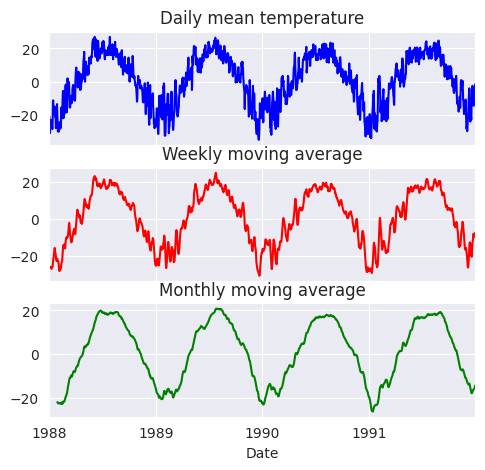

In [102]:
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(5.5, 5,5)

df['Mean temperature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temperature');

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average');

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average');

```{prf:theorem}
:label: th_moving_average

- Una ***media móvil simple*** de longitud $N$ asigna ponderaciones $1/N$ a las observaciones más recientes $y_{T}, y_{T-1},\dots, y_{T-N+1}$, y peso cero a todas las demás observaciones. Si $M_{T}$ es la media móvil, la media móvil de $N$ intervalos en el período $T$ es

$$
M_{T}=\frac{y_{T}+y_{T-1}+\cdots+y_{T-N+1}}{N}=\frac{1}{N}\sum_{t=T-N+1}^{T}y_{t}
$$

- Evidentemente, ***a medida que se dispone de cada nueva observación, ésta se añade a la suma a partir de la cual se calcula la media móvil*** y la observación más antigua se descarta (`rolling`). Si la varianza de una observación individual $y_{t}$ es $\sigma^{2}$, entonces, ***suponiendo que las observaciones no están correlacionadas***, la ***varianza de la media móvil*** es

$$
\textsf{Var}(M_{T})=\frac{\sigma^{2}}{N}.
$$

- A veces se utiliza una versión `"centrada"` de la media móvil, dada por

    $$
    M_{t}=\frac{1}{S+1}\sum_{i=-S}^{S}y_{t-i}
    $$

    donde el intervalo de la media móvil centrada es $N=2S+1$
```

**`Demostración`**

- Si la varianza de una observación individual $y_{t}$ es $\sigma^{2}$, entonces ***asumiendo que las observaciones no están correlacionadas, la varianza de la media móvil es***

$$
\textsf{Var}\left(M_{T}\right)=\textsf{Var}\left(\frac{1}{N}\sum_{t=T-N+1}^{T}y_{t}\right)=\frac{1}{N^2}\sum_{t=T-N+1}^{T}\textsf{Var}(y_{t})=\frac{\sigma^2}{N}.
$$

````{admonition} Observación
:class: tip

- La ***media móvil simple*** es un ***suavizador de datos lineal***, o un filtro lineal, ***porque sustituye cada observación*** $y_{t}$ ***por una combinación lineal de los otros puntos de datos que están cerca de él en el tiempo***. Si los pesos de la combinación lineal son iguales, la combinación lineal es una media.

- En algunos caso, podrían utilizarse pesos desiguales. Por ejemplo, el ***filtro de Hanning*** es una media móvil ponderada y centrada dada por

    $$
    \\[2mm]
    M_{t}^{H}=0.25 y_{t+1}+0.5y_{t}+0.25y_{t-1}.
    $$
    
    ***Julius von Hann***, meteorólogo austriaco del siglo XIX, utilizó este filtro para suavizar datos meteorológicos. 
````

- Una desventaja obvia de un filtro lineal como una ***media móvil*** es que un ***punto de datos inusual o erróneo o un valor atípico dominará las medias móviles que contengan esa observación***, contaminando las medias durante un periodo de tiempo igual al intervalo del filtro. Por ejemplo, consideremos la secuencia de observaciones

    $$
    \\[1mm]
    \{15, 18, 13, 12, 16, 14, 16, 17, 18, 15, 18, 200, 19, 14, 21, 24, 19, 25\}
    $$ (unusual_data_value)
    
    que aumenta de forma ***razonablemente constante de 15 a 25, excepto para el inusual valor 200***.

- Cualquier versión suavizada razonable de los datos también debería aumentar de forma constante de 15 a 25 y ***no hacer hincapié en el valor 200***. Ahora, incluso si 200 es una observación legítima, y no el ***resultado de un error de registro de datos (¡quizás debería ser 20!)***, es tan inusual que ***merece una atención especial y probablemente no debería analizarse junto con el resto de los datos***.

```{prf:definition} Medianas moviles corridas
:label: moving_median

- Las medianas móviles impares (también denominadas ***medianas móviles corridas***) son una ***alternativa a las medias móviles que suavizan eficazmente los datos cuando la serie puede estar contaminada con valores inusuales o valores atípicos***. La mediana de intervalo $N$ se define como

    $$
    m_{t}^{[N]}=\textsf{med}(y_{t-u},\dots,y_{t},\dots,\dots,y_{t+u}),
    $$
    
    donde $N=2u+1$. 
    
- La mediana es la observación intermedia en el orden de clasificación (u orden de valor). La ***mediana móvil de span 3*** es un suavizador de datos muy popular y eficaz, donde

    $$
    m_{t}^{3}=\textsf{med}(y_{t-1}, y_{t}, y_{t+1}).
    $$
```

- Este suavizador procesaría los datos de tres en tres, y ***sustituiría las tres observaciones originales por su mediana***. Si aplicamos este suavizador a los datos anteriores (ver datos {eq}`unusual_data_value`), obtenemos

$$
\{\underline{\hspace{9mm}},15, 13, 13, 14, 16, 17, 17, 18, 18, 19, 19, 19, 21, 21, 24, \underline{\hspace{9mm}}\}
$$

- Estos datos suavizados son una representación razonable de los datos originales, pero ignoran convenientemente el valor 200. ***Los valores iniciales/finales se pierden al utilizar la mediana móvil, y se representan con*** "$\underline{\hspace{9mm}}$".

- En general, una mediana móvil pasará secuencias monótonas de datos sin cambios. Seguirá una función escalonada en los datos, pero ***eliminará un pico o una alteración más persistente en los datos*** que tenga una duración de como máximo $u$ observaciones consecutivas. Las medianas móviles ***pueden aplicarse más de una vez para obtener una serie de observaciones aún más suave***.

- Por ejemplo, si se aplica la mediana móvil de longitud 3 a los datos suavizados anteriores, resulta en

$$
\{\underline{\hspace{9mm}}, 13, 13, 14, 16, 17, 17, 18, 18, 19, 19, 19, 21, 21, \underline{\hspace{9mm}}\}
$$

- Estos datos son ahora tan suaves como se puede conseguir; es decir, la aplicación repetida de la mediana móvil no cambiará los datos, aparte de los valores finales. ***Si hay muchas observaciones, la pérdida de información de los valores finales que faltan no es grave***. Sin embargo, si es necesario o deseable mantener las longitudes de los conjuntos de datos originales y suavizados, una forma sencilla de hacerlo es ***"copiar" o volver a añadir los valores finales de los datos originales***. Esto daría como resultado los datos suavizados:

$$
\{\underline{\hspace{9mm}}, 15, 18, 13, 13, 14, 16, 17, 17, 18, 18, 19, 19, 19, 21, 21, 19, 25, \underline{\hspace{9mm}}\}
$$

- También existen métodos para suavizar los valores finales. {cite}`tukey1977exploratory` es una referencia básica sobre este tema y contiene muchas otras técnicas útiles para el análisis de datos.

## Procesos estacionarios

- La ***estacionariedad es un supuesto fundamental en la teoría estadística y el análisis de series temporales***. Asegura que los ***estadísticos muestrales, como la media y la varianza, se mantengan constantes a lo largo del tiempo***, lo que permite su uso como ***estimaciones confiables para futuras ocurrencias***.

- En el contexto de series temporales, la ***estacionariedad implica que las propiedades de la serie, como: la media, la varianza y la autocorrelación, no cambien con el tiempo***. En resumen, la estacionariedad requiere que la serie tenga una ***media y una varianza constantes***, *sin patrones predecibles o repetitivos*.

```{prf:definition} Serie temporal estacionaria
:label: def_stationarity

- Una serie de tiempo se dice que es ***estrictamente estacionaria si sus propiedades no se ven afectadas por un cambio en el origen temporal***. Es decir, si la ***distribución de probabilidad conjunta de las observaciones*** $y_{t}, y_{t+1}, y_{t+2}, \dots, y_{t+n}$ ***es exactamente igual a la distribución de las observaciones*** $y_{t+k}, y_{t+k+1}, y_{t+k+2}, \dots, y_{t+k+n}$ entonces la es estrictamente estacionaria. 

- Cuando $n = 0$, el supuesto de estacionariedad significa que la ***distribución de probabilidad de*** $y_{t}$ ***es la misma en todos los periodos de tiempo*** y puede escribirse como $f(y)$.

- Estacionarieda implica un tipo de ***equilibrio estadístico o estabilidad en los datos***. En consecuencia, la serie temporal tiene una ***media constante*** definida de la forma habitual como

    $$
    \mu_{y}=\textsf{E}(y)=\int_{-\infty}^{\infty}yf(y)dy
    $$
    
    y una ***varianza constante*** definida como
    
    $$
    \\[1mm]
    \sigma_{y}^{2}=\textsf{Var}(y)=\int_{-\infty}^{\infty}(y-\mu_{y})^{2}f(y) dy.
    $$

- Para ***estimar estos parámetros se utilizan la media y la varianza muestrales***. Si las observaciones de la serie temporal son $y_{1}, y_{2},\dots, y_{T}$, la ***media muestral*** es

    $$
    \overline{y}=\hat{\mu}_{y}=\frac{1}{T}\sum_{t=1}^{T}y_{t}
    $$
    
    y la ***varianza muestral*** es
    
    $$
    s^{2}=\hat{\sigma}_{y}^{2}=\frac{1}{T}\sum_{t=1}^{T}(y_{t}-\overline{y})^{2}.
    $$ (sample_variance_T)

- Obsérvese que el divisor en la Ecuación {eq}`sample_variance_T` es $T$ en lugar del más familiar $T-1$. Esta es la convención común en muchas aplicaciones de series temporales, ***como*** $T$ ***no suele ser pequeño, habrá poca diferencia entre utilizar*** $T$ ***en lugar de*** $T-1$.
```

- Un ejemplo popular de serie temporal estacionaria es la ***serie de media cero, que se genera a partir de puntos que se muestrean de una distribución normal de media cero y varianza unitaria***.

- Aunque los puntos se muestrean secuencialmente de la distribución normal y se representan como una serie temporal, las ***observaciones individuales son independientes e idénticamente distribuidas (iid)***. La serie de media cero no muestra ningún patrón temporal, como la ***tendencia, la estacionalidad y la autocorrelación***.

In [103]:
from random import seed
from pandas import Series
import random 
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt

- Usamos una semilla `seed` generadora de números aleatorios, y creamos una ***serie de ruido blanco***

In [104]:
seed(1)
series = [random.gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

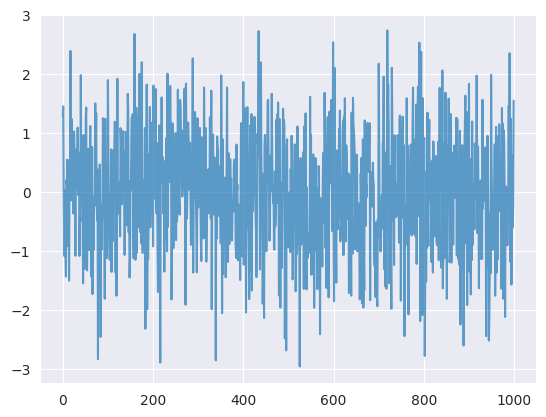

In [105]:
series.plot(alpha=0.7);

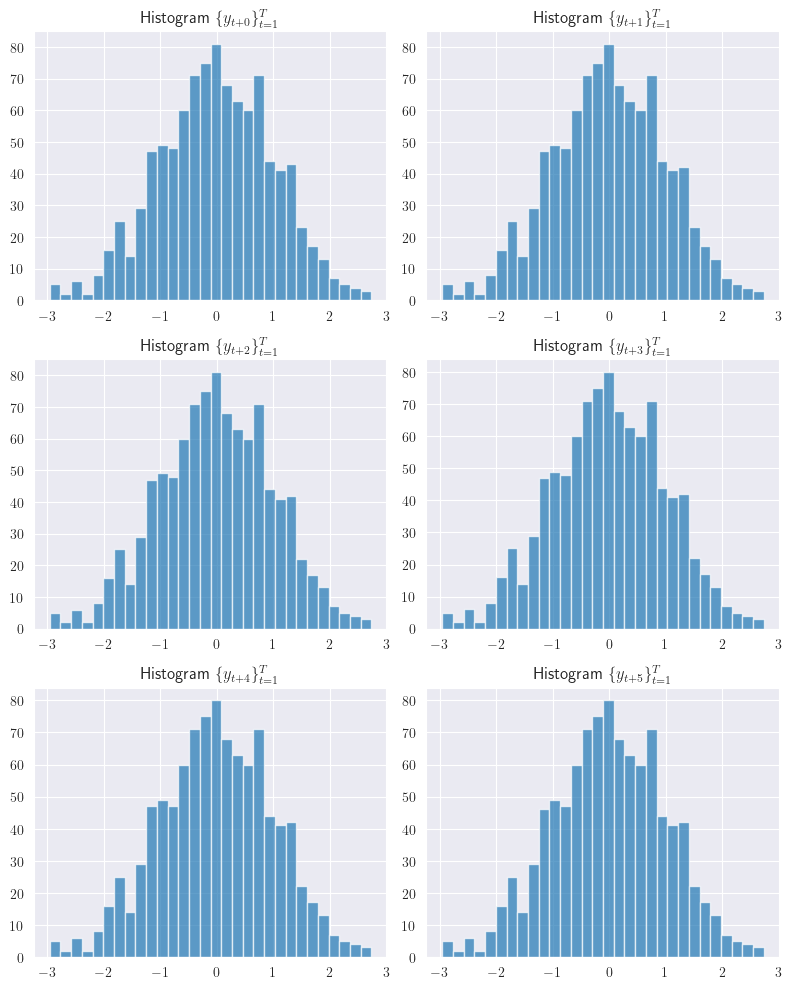

In [106]:
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(3, 2, figsize=(8, 10))

for i, ax in enumerate(axs.flat):
    ax.hist(series[i:], bins=30, alpha=0.7)
    ax.set_title(r'Histogram $\{y_{t+%d}\}_{t=1}^{T}$' % (i)) 

plt.tight_layout()
plt.show()
plt.rcParams['text.usetex'] = False

- Las ***series temporales reales suelen no ser estacionarias debido a tendencias y estacionalidades que afectan a la media, la varianza y la autocorrelación*** a lo largo del tiempo. Las ***fluctuaciones cíclicas no se consideran al definir la estacionariedad***, ya que estas solo pueden explicarse mediante variables exógenas (*variables o factores externos*).

- Una ***serie temporal sin patrones predecibles a largo plazo es considerada estacionaria***. Para ***verificar esto***, se utiliza la ***prueba de Dickey-Fuller Aumentada (ADF)*** y se aplica la diferenciación para ***estacionarizar series temporales no estacionarias***, eliminando tendencias y componentes estacionales. Los métodos de ***descomposición para tendencias y estacionalidades complejas se discuten a continuación***.

## Transformación de datos y ajustes

- Las ***transformaciones de datos*** son comunes en estadística y se utilizan principalmente para ***estabilizar la varianza de los datos***. La ***varianza no constante, conocida como `heteroscedasticidad`, es frecuente en series temporales***. Para abordar esto, se emplean modelos como `GARCH`. Ejemplos incluyen ***series relacionadas con la volatilidad de acciones como Tesla o la criptomoneda BTC***, donde una transformación logarítmica puede reducir la varianza.

````{prf:definition} Transformaciones de potencia 

- Un tipo muy popular de transformación de datos para tratar con la varianza es la ***familia de transformaciones de potencia***, dada por

    $$
    y^{(\lambda)}=
    \begin{cases}
    \frac{\displaystyle{y^{\lambda}-1}}{\displaystyle{\lambda\dot{y}^{\lambda-1}}}, &\quad\lambda\neq0\\[2mm]
    \dot{y}\lambda y, &\quad\lambda=0
    \end{cases},\quad\text{donde}\quad\dot{y}=\exp\left[\frac{1}{T}\sum_{t=1}^{T}\ln(y_{t})\right].
    $$
    
    $\dot{y}$ es conocida como la ***media geométrica de las observaciones***.
````

````{admonition} Observación
:class: tip

- Si $\lambda=1$, ***no hay transformación***. Los valores típicos de $\lambda$ utilizados con datos de series temporales son:

    1. $\lambda=0.5$ (***transformación de raíz cuadrada***)
    2. $\lambda=0$ (***transformación logarítmica*** $(y^{\lambda}-1)/\lambda\rightarrow\log(y)$ cuando $\lambda\rightarrow 0$)
    3. $\lambda=-0.5$ (***transformación recíproca de raíz cuadrada***)
    4. $\lambda=-1$ (***transformación inversa***).

- El ***divisor es un factor de escala*** que permite comparar la suma residual de cuadrados al ajustar diferentes modelos con diferentes transformaciones. La ***transformación logarítmica se usa cuando la variabilidad de la serie temporal original aumenta con su nivel medio***, siendo óptima cuando la desviación típica aumenta linealmente con la media.
````

- La ***transformación logarítmica*** también tiene una interpretación física como ***cambio porcentual***. Para ilustrarlo, considere la serie de tiempo $y_{1}, y_{2}, \dots, y_{T}$ y supongamos que estamos interesados en el porcentaje de cambio en $y_{t}$, digamos,

$$
x_{t}=\frac{100(y_{t}-y_{t-1})}{y_{t-1}}.
$$

- El ***cambio porcentual aproximado*** de $y_{t}$ puede calcularse a partir de las ***diferencias de la serie temporal transformada logarítmicamente*** $x_{t}\cong 100[\ln(y_{t}) - \ln(y_{t}-1)]$ dado que,

    $$
    \\[1mm]
    \begin{align*}
    100[\ln(y_{t}) - \ln(y_{t}-1)]&=100\ln\left(\frac{y_{t}}{y_{t-1}}\right)\\
    &=100\ln\left(\frac{y_{t-1}+(y_{t}-y_{t-1})}{y_{t-1}}\right)\\
    &=100\ln\left(1+\frac{x_{t}}{100}\right)\cong x_{t},
    \end{align*}
    $$
    
    nótese que $\ln(1+z)\cong z$ cuando $z$ es pequeño.

## Ajustes estacionales y de tendencia

- Los ***ajustes de tendencia y estacionales son esenciales en el modelado y la predicción de series temporales***. Una serie temporal con tendencia se considera no estacionaria. Para simplificar el análisis, es común ***eliminar la tendencia ajustando los datos a un modelo de regresión y luego sustraerlo de las observaciones originales***, dejando residuos sin tendencia.

## Diferenciación

- Otro enfoque para ***eliminar la tendencia es mediante la diferenciación de los datos***; es decir, ***aplicando el operador de diferencia a la serie temporal original para obtener una nueva serie temporal***, digamos,

  $$
  x_{t}=y_{t}-y_{t-1}=\nabla y_{t},
  $$

  donde $\nabla$ es el ***operador de diferencia*** (`backward`). Otra forma de escribir la operación de diferencia es en términos de un ***operador de desplazamiento hacia atrás*** (`backshift operator`) $B$, definido como $By_{t} = y_{t-1}$, entonces

  $$
  x_{t}=(1-B)y_{t}=\nabla y_{t}=y_{t}-y_{t-1}
  $$

  con $\nabla=(1-B)$.

- La diferenciación puede ***realizarse sucesivamente si es necesario hasta que se elimine la tendencia***; por ejemplo, la *segunda diferencia* es

  $$
  x_{t}=\nabla^{2}y_{t}=\nabla(\nabla y_{t})=(1-B)^{2}y_{t}=(1-2B+B^{2})=y_{t}-2y_{t-1}+y_{t-2}
  $$

- En general, las ***potencias del operador de desplazamiento y diferencia hacia atrás*** se definen como

  $$
  B^{d}y_{t}=y_{t-d}\quad\text{y}\quad\nabla^{d}=(1-B)^{d}.
  $$

- La ***diferenciación se usa para eliminar la estacionalidad*** en series temporales que tienen tanto ***tendencia como componentes estacionales***. Se define un operador de diferencia estacional con rezago $d$ como

  $$
  \nabla_{d}y_{t}=(1-B^{d})=y_{t}-y_{t-d}.
  $$

- Por ejemplo, si tuviéramos ***datos mensuales con una estación anual*** (*una situación muy común*), es probable que usemos $d=12$, por lo que los ***datos diferenciados estacionalmente serían***

  $$
  \nabla_{12}y_{t}=(1-B^{12})y_{t}=y_{t}-y_{t-12}
  $$

- Cuando hay ***tendencia y componentes estacionales al mismo tiempo***, podemos eliminarlos ***diferenciando primero estacionalmente*** y ***luego usando la diferenciación regular para eliminar la tendencia***.

````{admonition} Observación
:class: tip

- La ***diferenciación es más simple que ajustar un modelo de tendencia porque no necesita estimar parámetros***. Además, mientras que el ajuste del modelo supone que la tendencia es constante en el tiempo, la diferenciación permite que cambie. La ***primera diferencia considera cambios en la media***, la ***segunda en la pendiente***, y así sucesivamente. ***Por lo general, una o dos diferencias son suficientes para eliminar una tendencia*** en los datos.

- Para ***verificar si la diferenciación de primer orden ha estacionado una serie temporal***, se puede trazar la función de autocorrelación ***(ACF) y realizar la prueba de Ljung-Box*** en la serie diferenciada. ***Esta prueba determina si la autocorrelación observada es estadísticamente significativa***, con la ***hipótesis nula de que la serie es aleatoria y sin autocorrelación predecible***.
````

- Ilustraremos esto con la serie temporal del ***índice industrial*** [Dow Jones (DJIA)](https://es.wikipedia.org/wiki/%C3%8Dndice_burs%C3%A1til_Dow_Jones), tomando la ***primera diferencia de los valores de cierre*** y trazando la serie resultante.

In [107]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

In [108]:
djia_df = pd.read_excel('/home/lihkir/Data/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


- Analicemos la columna `Date` y utilicémosla como índice de fila para el `DataFrame` y dejémosla como columna

In [109]:
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


- Utilizaremos los valores `"Close"` del `DJIA` para ilustrar la diferenciación

In [110]:
first_order_diff = djia_df['Close'].diff(1)

- Trazamos las series temporales originales y las de primera diferencia

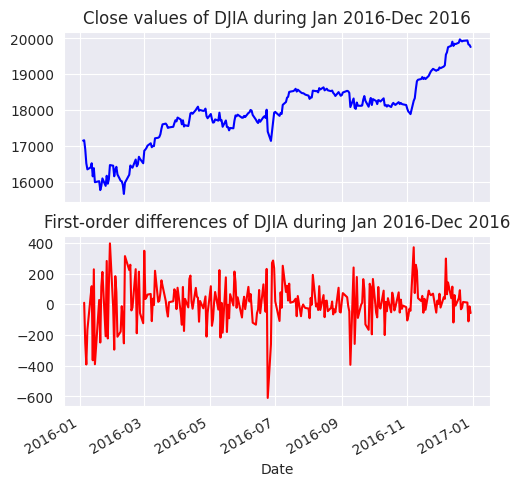

In [111]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b');
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016');
first_order_diff.plot(ax=ax[1], color='r');
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016');

- A continuación, se calcula el ***ACF para diferentes rezagos y se verifica la prueba de Ljung-Box***. La figura siguiente muestra la `ACF` de los valores de cierre del `DJIA` y ***también para la serie temporal de diferencias de primer orden***.

- Obsérvese que ***para las series diferenciadas, la `ACF` no muestra un patrón predecible y cae repentinamente cerca de cero***. Además, el valor $p$ de la prueba nos hace ***aceptar la hipótesis nula de la prueba de Ljung-Box*** (*aleatoriedad e independencia*) para las series diferenciadas

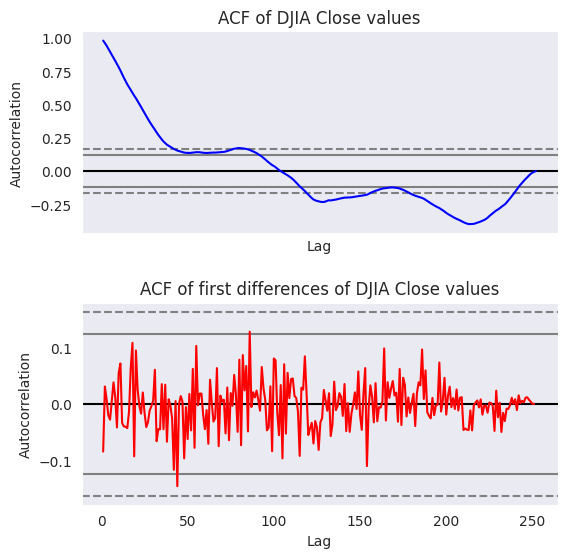

In [112]:
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
autocorrelation_plot(djia_df['Close'], color='b', ax=ax[0])
ax[0].set_title('ACF of DJIA Close values')
autocorrelation_plot(first_order_diff.iloc[1:], color='r', ax=ax[1])
ax[1].set_title('ACF of first differences of DJIA Close values')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- Para la ***prueba de Ljung-Box, utilizamos*** la función `acf` del paquete `statsmodels.tsa.stattools`. La función `acf` está hecha para ***devolver las autocorrelaciones, los intervalos de confianza, los estadísticos*** $Q$ ***y los valores*** $p$ de la prueba

In [113]:
acf_djia, confint_djia, qstat_djia, pvalues_djia = stattools.acf(djia_df['Close'],
                                                                 nlags=20,
                                                                 qstat=True,
                                                                 alpha=0.05)

- Comprobemos si con un ***nivel de confianza del*** 95% ($\alpha=0.05$) ***si se rechaza la hipótesis nula*** en cualquiera de los rezagos para los ***valores no diferenciados*** del `DJIA Close`

In [114]:
alpha = 0.05
for l, p_val in enumerate(pvalues_djia):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is rejected at lag = 0 for p-val = 2.857506276385174e-55
Null hypothesis is rejected at lag = 1 for p-val = 1.7871763971271254e-105
Null hypothesis is rejected at lag = 2 for p-val = 9.927155881909959e-154
Null hypothesis is rejected at lag = 3 for p-val = 8.084096278834598e-200
Null hypothesis is rejected at lag = 4 for p-val = 9.125287802249553e-244
Null hypothesis is rejected at lag = 5 for p-val = 1.0907828815951678e-285
Null hypothesis is rejected at lag = 6 for p-val = 0.0
Null hypothesis is rejected at lag = 7 for p-val = 0.0
Null hypothesis is rejected at lag = 8 for p-val = 0.0
Null hypothesis is rejected at lag = 9 for p-val = 0.0
Null hypothesis is rejected at lag = 10 for p-val = 0.0
Null hypothesis is rejected at lag = 11 for p-val = 0.0
Null hypothesis is rejected at lag = 12 for p-val = 0.0
Null hypothesis is rejected at lag = 13 for p-val = 0.0
Null hypothesis is rejected at lag = 14 for p-val = 0.0
Null hypothesis is rejected at lag = 15 for p-val = 0.0

- Obtengamos los ***intervalos de confianza, los estadísticos*** $Q$ ***de Ljung-Box y los valores*** $p$ para los ***valores diferenciados*** del `DJIA Close`

In [115]:
acf_first_diff, confint_first_diff,\
qstat_first_diff, pvalues_first_diff = stattools.acf(first_order_diff.iloc[1:],
                                                     nlags=20,
                                                     qstat=True,
                                                     alpha=0.05)

- Comprobemos si con un ***nivel de confianza del 95%*** ($\alpha = 0.05$) ***si se rechaza la hipótesis nula*** en cualquiera de los rezagos

In [116]:
alpha = 0.05
for l, p_val in enumerate(pvalues_first_diff):
    if p_val > alpha:
        print('Null hypothesis is accepted at lag = {} for p-val = {}'.format(l, p_val))
    else:
        print('Null hypothesis is rejected at lag = {} for p-val = {}'.format(l, p_val))

Null hypothesis is accepted at lag = 0 for p-val = 0.17742519268365267
Null hypothesis is accepted at lag = 1 for p-val = 0.35711074717194824
Null hypothesis is accepted at lag = 2 for p-val = 0.5569664476694898
Null hypothesis is accepted at lag = 3 for p-val = 0.7025937592112144
Null hypothesis is accepted at lag = 4 for p-val = 0.7937258941281413
Null hypothesis is accepted at lag = 5 for p-val = 0.880645293990265
Null hypothesis is accepted at lag = 6 for p-val = 0.9058055508095895
Null hypothesis is accepted at lag = 7 for p-val = 0.9461503874902826
Null hypothesis is accepted at lag = 8 for p-val = 0.9529107001186853
Null hypothesis is accepted at lag = 9 for p-val = 0.9452880323047996
Null hypothesis is accepted at lag = 10 for p-val = 0.9103701842715781
Null hypothesis is accepted at lag = 11 for p-val = 0.9303312940619602
Null hypothesis is accepted at lag = 12 for p-val = 0.9412519715905938
Null hypothesis is accepted at lag = 13 for p-val = 0.9498882104867831
Null hypothesis

- Examinaremos ahora la serie temporal de las ***temperaturas medias diarias del río Fisher*** para demostrar el efecto de la ***diferenciación estacional***. La ***serie original y la media mensual muestran un comportamiento estacional*** evidente.

- Se calcula la ***autocorrelación de la media mensual*** y se traza utilizando la función `autocorrelation_plot` de `pandas.plotting`. Esta función es útil para ***identificar la autocorrelación significativa en una serie temporal y muestra intervalos de confianza del 95% y 99%***. La ***ACF de las temperaturas medias mensuales oscila dentro y fuera de los intervalos de confianza del 99%***, indicando que la serie no es estacionaria debido a la estacionalidad.

In [117]:
daily_temp = pd.read_excel('/home/lihkir/Data/mean-daily-temperature-fisher-river.xlsx')
daily_temp.head()

,Date,Mean_Temperature
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


- Hacemos que la ***fecha formateada sea el índice de la fila*** del conjunto de datos y elimine la columna `Date`

In [118]:
daily_temp.index = daily_temp['Date'].map(lambda date: pd.to_datetime(date, '%Y-%m-%d'))
daily_temp.drop('Date', axis=1, inplace=True)
daily_temp.head()

,Mean_Temperature
Date,
1988-01-01,-23.0
1988-01-02,-20.5
1988-01-03,-22.0
1988-01-04,-30.5
1988-01-05,-31.0


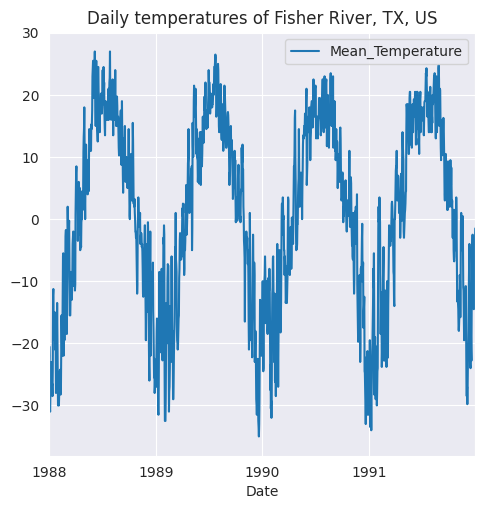

In [119]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Daily temperatures of Fisher River, TX, US');
daily_temp.plot(ax=ax);

- Calculamos la ***temperatura media mensual***

In [120]:
montly_resample = daily_temp['Mean_Temperature'].resample('M')
monthly_mean_temp = montly_resample.mean()
print('Shape of monthly mean temperature dataset:', monthly_mean_temp.shape)
monthly_mean_temp.head()

Shape of monthly mean temperature dataset: (48,)


Date
1988-01-31   -22.137097
1988-02-29   -19.025862
1988-03-31    -8.258065
1988-04-30     2.641667
1988-05-31    11.290323
Freq: ME, Name: Mean_Temperature, dtype: float64

- Trazamos la ***temperatura media mensual***

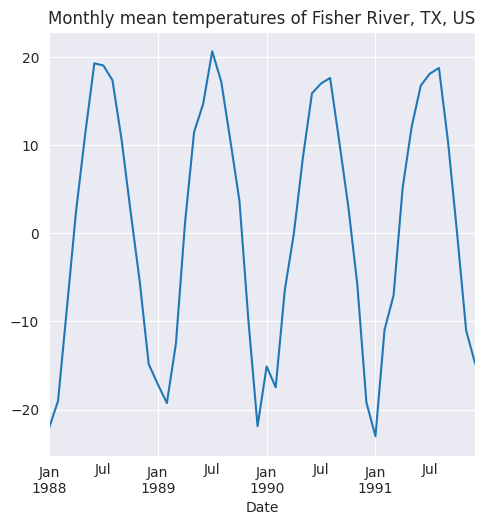

In [121]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Monthly mean temperatures of Fisher River, TX, US')
monthly_mean_temp.plot(ax=ax);

- Trazamos la ***ACF de la temperatura media mensual*** con `pandas.tools.plotting.autocorrelation_plot`

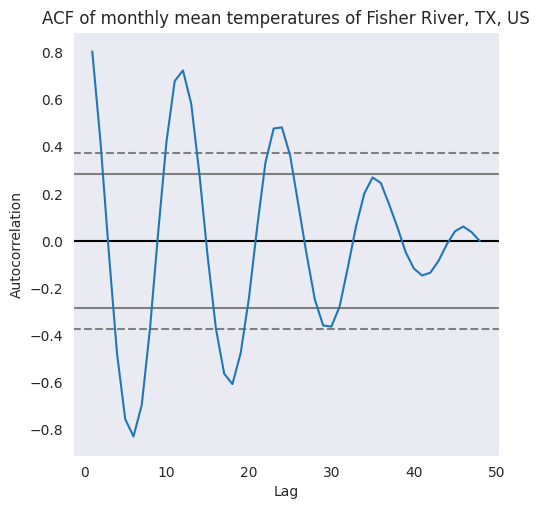

In [122]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of monthly mean temperatures of Fisher River, TX, US')
autocorrelation_plot(monthly_mean_temp, ax=ax);

- Tomamos las ***diferencias estacionales con un periodo de 12 meses*** en las temperaturas medias mensuales. La diferenciación estacional ***deja valores nulos en sus primeros 12 elementos, que se eliminan antes del análisis***:

In [123]:
seasonal_diff = monthly_mean_temp.diff(12)
seasonal_diff = seasonal_diff[12:]

- Trazamos las diferencias estacionales. Las ***diferencias estacionales parecen ser variaciones aleatorias***, como se muestra en la siguiente figura

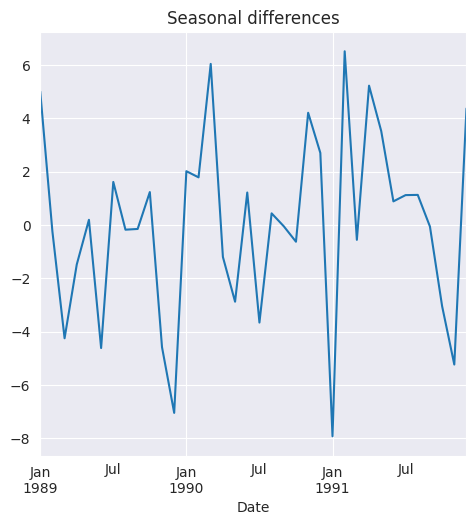

In [124]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('Seasonal differences');
seasonal_diff.plot(ax=ax);

- Trazamos las diferencias estacionales. Volvemos a utilizar la función `autocorrelation_plot` para generar la `ACF` de la serie diferenciada y los intervalos de confianza al 99% del nivel de confianza. Podemos ver en la siguiente figura que la ***ACF nunca cruza los intervalos de confianza del 99% para rezagos que varían de 0 a más de 35***

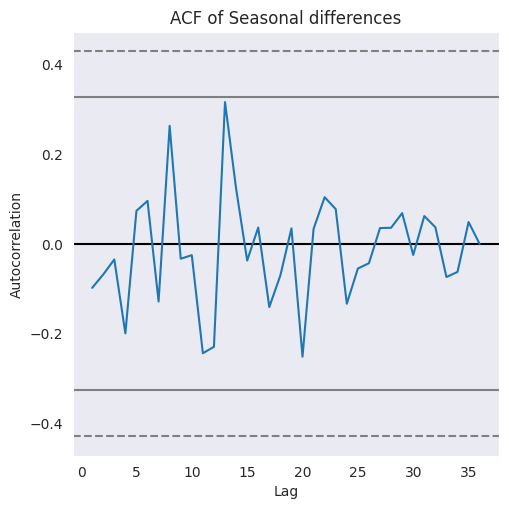

In [125]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
ax.set_title('ACF of Seasonal differences');
autocorrelation_plot(seasonal_diff, ax=ax);

- Realizamos la ***prueba de Ljung-Box sobre la temperatura media mensual*** para obtener los valores $p$. Utilizaremos rezagos de hasta 10. Los valores $p$ reales se confirman ejecutando la función `stattools.acf` en los ***datos medios mensuales*** de la siguiente manera

In [126]:
_, _, _, pval_monthly_mean = stattools.acf(monthly_mean_temp,
                                           nlags=10, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


- La prueba de ***Ljung-Box*** se realiza también con las ***series diferenciadas estacionalmente***.

In [127]:
_, _, _, pval_seasonal_diff = stattools.acf(seasonal_diff,
                                            nlags=10, 
                                            qstat=True, 
                                            alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_seasonal_diff<=0.05))

Null hypothesis is rejected for lags: (array([], dtype=int64),)


- ***No hay rezagos para los que se rechace la hipótesis nula*** de la prueba de Ljung-Box. La elección de una estrategia de diferenciación puede determinarse mediante un análisis exploratorio de los datos como los descritos hasta ahora. Sin embargo, ***cuando es difícil determinar qué transformaciones son necesarias para estacionar una serie de tiempo, se realiza la prueba ADF para una orientación***

## Prueba de Dickey-Fuller

- Dada serie temporal generada por un proceso con una estructura ***Autorregresiva de Primer Orden, AR(1)***, también conocida como proceso de primer orden de Markov, y es ampliamente utilizada en diversas disciplinas

  $$
  y_{t}=\phi y_{t-1}+\varepsilon_{t},
  $$(ar1_dickey_fuller)

  donde $\phi$ es un término de perturbación estacionario o ***coeficiente de autocorrelación***, y $\varepsilon_{t}$ es una ***variable aleatoria estacionaria e independiente***.

- Si $\phi=1$, la ***ecuación característica del proceso*** tiene una raíz unitaria, lo que ***indica que el proceso es no estacionario***. Mientras $\varepsilon_{t}$ sea estacionario, las primeras diferencias de $y_{t}$ son estacionarias. La serie $y_{t}$ es de ***integración de primer orden***. Si $\phi<1$, la serie temporal $\phi_{t}$ ***es estacionaria*** en el sentido de que es una ***integración de orden cero***.

- La prueba de DF {cite}`dickey1979distribution` consiste en la ***hipótesis nula de que en un modelo, representado por la*** Ecuación {eq}`ar1_dickey_fuller` para $\delta=\phi-1$ como sigue

  $$
  \Delta y_{t}=\delta y_{t-1}+\varepsilon_{t}.
  $$

- En el caso de $\delta=0$, la serie temporal $y_{t}$ es un ***proceso browniano con acumulación de choques aleatorios***. La ***hipótesis alternativa*** $\delta<0$ ***implica que la variable es estacionaria***. El ***estadístico de prueba*** se calcula como $t=\hat{\delta}/\hat{\sigma}_{\delta}$, ***similar al estadístico*** $t$ de Student, pero, con una ***distribución de probabilidad diferente***. Para tomar una ***decisión, se necesita un valor crítico en un nivel de significancia elegido***.

````{admonition} Observación
:class: tip

- Si el ***estadístico de prueba supera un valor crítico***, entonces ***no se puede rechazar la hipótesis nula sobre la presencia de una raíz unitaria en una serie***. Sin embargo, ***si el estadístico de prueba es menor que el valor crítico, entonces se rechaza la hipótesis nula a favor de la estacionariedad*** de la serie temporal.
````

- Apliquemos la ***prueba ADF para verificar la estacionariedad en los datos mensuales de millas de avión de US Airlines*** recogidos entre 1963 y 1970. Utilizaremos la función `adfuller` de la `API` `statsmodels.tsa.stattools` para realizar las pruebas

- Antes de ejecutar la prueba `ADF`, la serie de tiempo se carga en un `pandas.DataFrame` y como se muestra en la siguiente figura, es ***evidente que la serie temporal tiene una tendencia alcista, así como estacionalidad*** y, por lo tanto, ***no es estacionaria***, lo que se ***verificará mediante la prueba ADF***

In [128]:
air_miles = pd.read_csv('/home/lihkir/Data/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles.Month

In [129]:
print('Shape of the DataFrame:', air_miles.shape)
air_miles.head()

Shape of the DataFrame: (97, 2)


,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


- Cambiemos el nombre de la segunda columna

In [130]:
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970':\
                          'Air miles flown'}, inplace=True)

- Comprobamos si existen datos faltantes y eliminamos la fila correspondiente

In [131]:
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


- Trazamos la serie temporal de millas aéreas voladas

Text(0.5, 1.0, 'Monthly air miles flown during 1963 - 1970')

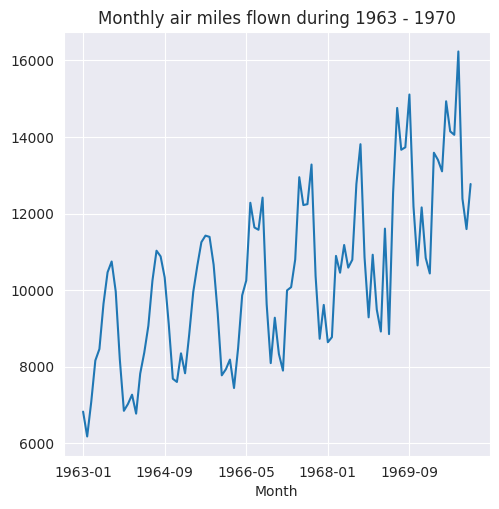

In [132]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
air_miles['Air miles flown'].plot(ax=ax)
ax.set_title('Monthly air miles flown during 1963 - 1970')

In [133]:
adf_result = stattools.adfuller(air_miles['Air miles flown'], autolag='AIC')

In [134]:
print('p-val of the ADF test in air miles flown:', adf_result[1])

p-val of the ADF test in air miles flown: 0.9945022811234028


- El ***argumento*** `autolag='AIC'` ***indica a la función que elija un número adecuado de rezagos*** para la prueba, ***maximizando el criterio de información de Akaike (AIC)***. Esto ***evita la necesidad de especificar manualmente el número de rezagos y reduce el proceso de prueba y error***.

- El $p$-value de la prueba ADF es 0.9945, lo que ***confirma nuestros hallazgos del análisis exploratorio de datos***. La función `adfuller` devuelve varios valores en una tupla. Hemos almacenado los resultados en la variable `adf_resultado` y accedido al segundo elemento `adf_result[1]` ***para obtener el*** $p$***-value de la prueba***. También se proporcionan otros datos interesantes, como el número de ***rezagos utilizados*** (`usedlag`) y los ***valores críticos del estadístico de prueba*** para diferentes niveles de confianza.

## Descomposición de series temporales

- También existe un ***enfoque "clásico" para la descomposición de una serie de tiempo en componentes de tendencia y estacionales*** (de hecho, hay muchos algoritmos de descomposición diferentes; aquí explicamos un enfoque muy simple pero útil). El modelo matemático general para esta descomposición es

  $$
  y_{t}=f(S_{t}, T_{t}, \varepsilon_{t})
  $$

  donde $S_{t}$ es el ***componente estacional***, $T_{t}$ es el ***efecto de la tendencia*** y $\varepsilon_{t}$ es el ***componente de error aleatorio***. Normalmente, hay dos formas para la función $f$: un ***modelo aditivo***

  $$
  y_{t}=S_{t}+T_{t}+\varepsilon_{t}
  $$

  y un ***modelo multiplicativo***

  $$
  y_{t}=S_{t}T_{t}\varepsilon_{t}.
  $$

- El ***modelo aditivo es apropiado si la magnitud (amplitud) de la variación estacional no varía con el nivel de la serie***, mientras que la ***versión multiplicativa es más apropiada si la amplitud de las fluctuaciones estacionales aumenta o disminuye con el nivel promedio de la serie*** temporal. 

- La descomposición es ***útil para desglosar una serie temporal en estas partes componentes***. Para el modelo aditivo, es relativamente fácil. ***Primero, modelaríamos y eliminaríamos la tendencia***. Se podría utilizar un modelo lineal simple para hacer esto, por ejemplo, 

$$
T_{t}=\beta_{0}+\beta_{1}t.
$$

````{admonition} Observación
:class: tip

- Otros métodos también podrían ser utilizados. ***Los promedios móviles pueden ser utilizados para aislar una tendencia y eliminarla de los datos originales***, al igual que ***métodos de regresión más sofisticados***. Estas técnicas podrían ser apropiadas ***cuando la tendencia no es una línea recta a lo largo de la historia de la serie temporal***. También se podría usar la diferenciación, aunque típicamente no se usa en el enfoque de descomposición clásico.
````

- Una vez ***estimado el componente de tendencia*** o ciclo de tendencia, la serie sin tendencia es 

  $$
  y_{t}-T_{t}=S_{t}+\varepsilon_{t}.
  $$

- Se calculan factores estacionales para cada período, como los meses, tomando un ***promedio de los efectos estacionales para cada período***. Esto proporciona índices estacionales que representan la variación estacional para cada período. En la ***descomposición multiplicativa***, se utilizan ratios para ***remover tendencia***

  $$
  \frac{y_{t}}{T_{t}}=S_{t}\varepsilon_{t}.
  $$

- Los ***índices estacionales*** se calculan tomando el promedio de todos los valores sin tendencia para cada período en la temporada.

- En esta sección, discutiremos los siguientes dos métodos populares para ***estimar la tendencia y los componentes estacionales***:

    - Método de ***medias móviles***
    - ***Descomposición estacional*** y de ***tendencia*** mediante la librería `Python statsmodels.tsa`

## Medias móviles y efectos de suavización

- Las ***medias móviles (MA)*** en un índice temporal $t$ ***estiman el componente de ciclo de tendencia media*** $M_{t}$ y se calcula sacando la ***media a lo largo del periodo de tiempo*** $t\pm k$, donde $k$ es el rango de la **MA**

$$\widehat{M}_{t}=\frac{y_{t-k}+y_{t-k+1}+\cdots+y_{t}+\cdots+y_{t+k-1}+y_{t+k}}{2k+1}$$

- La toma de ***medias móviles tiene el efecto de suavizar la serie temporal original eliminando el ruido aleatorio***. Comúnmente, el número total de observaciones $m = 2k + 1$ se utiliza para describir la media móvil como **MA** de orden $m$, que en adelante se denotará como $\widehat{M}_{t}^{(m)}$.


- El análisis de las medias móviles se ilustra utilizando el ***ejemplo de las cotizaciones de acciones de IBM de 1962 a 1965***. La serie temporal original, representada en azul en el gráfico, ***muestra movimientos irregulares debido al ruido aleatorio***. Por otro lado, ***la media móvil (MA) de 5 días***, en rojo, ***es más suave que la serie original*** y ofrece una ***estimación del patrón de tendencia-ciclo***. Se observa un efecto de suavización en la serie temporal original debido a la MA de 5 días, como se muestra en el gráfico.

In [135]:
import pandas as pd
from matplotlib import pyplot as plt

- Cargamos el conjunto de datos en un `pandas.DataFrame`

In [136]:
ibm_df = pd.read_csv('/home/lihkir/Data/ibm-common-stock-closing-prices.csv')
ibm_df.index = ibm_df['Date']

In [137]:
print('Shape of the dataframe:', ibm_df.shape)
ibm_df.head()

Shape of the dataframe: (1009, 2)


,Date,IBM common stock closing prices
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


- Renombramos la *segunda columna*

In [138]:
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df.head()

,Date,Close_Price
Date,,
1962-01-02,1962-01-02,572.00
1962-01-03,1962-01-03,577.00
1962-01-04,1962-01-04,571.25
1962-01-05,1962-01-05,560.00
1962-01-08,1962-01-08,549.50


- Eliminamos *datos faltantes*

In [139]:
missing = (pd.isnull(ibm_df['Date'])) & (pd.isnull(ibm_df['Close_Price']))
print('No. of rows with missing values:', missing.sum())
ibm_df = ibm_df.loc[~missing, :]

No. of rows with missing values: 0


- Para ilustrar la idea de la media móvil, ***calculamos una media móvil semanal tomando una ventana de 5 días en lugar de 7***, ya que el ***trading se produce solo durante los días laborables***.

In [140]:
ibm_df['5-Day Moving Avg'] = ibm_df['Close_Price'].rolling(5).mean()

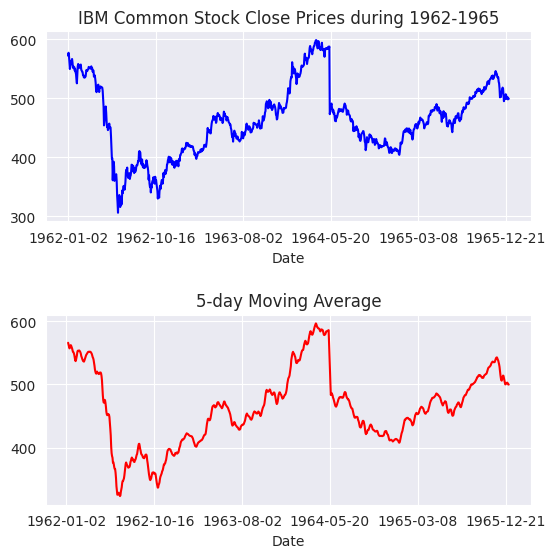

In [141]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(2,1,1)
ibm_df['Close_Price'].plot(ax=ax, color='b')
ax.set_title('IBM Common Stock Close Prices during 1962-1965')
ax = fig.add_subplot(2,1,2)
ibm_df['5-Day Moving Avg'].plot(ax=ax, color='r')
ax.set_title('5-day Moving Average')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- La mencionada **MA** de orden impar $m = 2\times2 + 1 = 5$ y es ***simétrica con igual número de observaciones a ambos lados del índice de tiempo*** $t$ en el que se calcula la **MA**. Sin embargo, es posible tener una ***MA asimétrica de orden par*** $m = 2k$.

- La ***asimetría de un promedio móvil de orden par*** puede ser ***eliminada tomando un segundo promedio móvil de igual orden***. Ilustremos esto considerando el primer promedio móvil de orden dos y calculado como

  $$
  \widehat{M}_{t}^{(2)}=\frac{y_{t-1}+y_{t}}{2}
  $$

- Otro ***promedio móvil de segundo orden***, cuando es ***aplicado a la serie*** $\widehat{M}_{t}^{(2)}$, ***producirá un promedio móvil final simétrico*** que tiene una observación a cada lado de la observación de la serie temporal original en el índice $t$

  $$
  \overline{\widehat{M}_{t}^{(2)}}^{(t, t+1)}=\frac{\widehat{M}_{t}^{(2)}+\widehat{M}_{t+1}^{(2)}}{2}=\frac{1}{2}\left(\frac{y_{t-1}+y_{t}}{2}+\frac{y_{t}+y_{t+1}}{2}\right)=\frac{1}{4}y_{t-1}+\frac{1}{2}y_{t}+\frac{1}{4}y_{t+1}.
  $$

- Análogamente, dada la MA $\widehat{M}_{t}^{(3)}=(y_{t-1}+y_{t}+y_{t+1})/3$, se tiene que (`verifíquelo`)

  $$
  \begin{align*}
  \overline{\widehat{M}_{t}^{(3)}}^{(t-1, t+1)} &= \frac{\widehat{M}_{t-1}^{(3)}+\widehat{M}_{t}^{(3)}+\widehat{M}_{t+1}^{(3)}}{3}=\frac{1}{9}y_{t-2}+\frac{2}{9}y_{t-1}+y_{t}+\frac{2}{9}y_{t+1}+\frac{1}{9}y_{t+2}\\
  \overline{\widehat{M}_{t}^{(3)}}^{(t, t+1)} &= \frac{\widehat{M}_{t}^{(3)}+\widehat{M}_{t+1}^{(3)}}{2}=\frac{1}{6}y_{t-1}+\frac{1}{3}y_{t}+\frac{1}{3}y_{t+1}+\frac{1}{6}y_{t+2}.
  \end{align*}
  $$

- El gráfico que se presenta aquí muestra ***seis medias móviles***, a saber $\widehat{M}_{t}^{(2)}$, $\overline{\widehat{M}_{t}^{(2)}}^{(t,t+1)}$, $\widehat{M}_{t}^{(4)}$, $\overline{\widehat{M}_{t}^{(4)}}^{(t,t+1)}$, $\widehat{M}_{t}^{(3)}$ y $\overline{\widehat{M}_{t}^{(3)}}^{(t-1,t+1)}$ para los precios de las ***acciones de IBM hasta los primeros 45 días***. Como se ilustra, la suavidad de los **MA** resultantes ***mejora con el aumento del orden*** $m$ y el número de repeticiones $n$.

- En la siguiente figura, las **MA** de tipo $\widehat{M}_{t}^{(m)}$ ***se indican con líneas continuas***, mientras que las del tipo $\overline{\widehat{M}_{t}^{(m)}}^{(t-i, t+j)}, i,j\in\{0, 1, 2,\dots\}$ ***se representan con líneas discontinuas***. Para generar las seis **MA** mencionadas hemos utilizado ampliamente las funciones `rolling` y `mean`

In [142]:
MA2 = ibm_df['Close_Price'].rolling(window=2).mean()
TwoXMA2 = MA2.rolling(window=2).mean()

MA4 = ibm_df['Close_Price'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()

MA3 = ibm_df['Close_Price'].rolling(window=3).mean()
ThreeXMA3 = MA3.rolling(window=3).mean()

- ***Eliminemos los valores*** `NaN` de las variables anteriores

In [143]:
TwoXMA2 = MA2.dropna()
TwoXMA4 = MA4.dropna()
ThreeXMA3 = MA3.dropna()

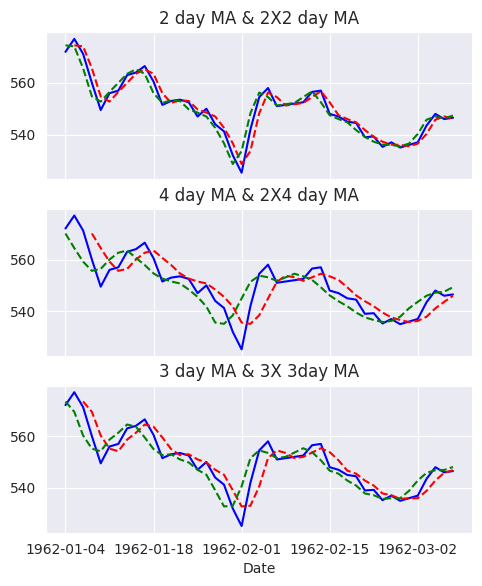

In [144]:
f, axarr = plt.subplots(3, sharex=True)
f.set_size_inches(5.5, 6.5)

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[0])
MA2.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[0])
TwoXMA2.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[0])
axarr[0].set_title('2 day MA & 2X2 day MA');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[1])
MA4.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[1])
TwoXMA4.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[1])
axarr[1].set_title('4 day MA & 2X4 day MA');

ibm_df['Close_Price'].iloc[:45].plot(color='b', linestyle = '-', ax=axarr[2])
MA3.iloc[:45].plot(color='r', linestyle = '--', ax=axarr[2])
ThreeXMA3.iloc[:45].plot(color='g', linestyle = '--', ax=axarr[2])
axarr[2].set_title('3 day MA & 3X 3day MA');

## Ajuste estacional mediante media móvil

- La propiedad de ***media ponderada*** de las $\overline{\widehat{M}_{t}^{(m)}}^{(t-i, t+j)}\hspace{-6mm},i,j\in\{0,1,2,\dots\}$ ***medias móviles*** tiene aplicación en ***suavizar datos con estacionalidad para generar estimaciones de ciclos de tendencia***. Por ejemplo, dadas las ***observaciones trimestrales*** podemos aplicar la **MA**: $\overline{\widehat{M}_{t}^{(4)}}^{(t, t+1)}$ para suavizar los datos.

- El enfoque de utilizar **MA** ponderado de la forma $\overline{\widehat{M}_{t}^{(4)}}^{(t, t+1)}$ se ilustra utilizando los datos de ***producción de cerveza de Australia***. La serie temporal representa la ***producción trimestral de cerveza desde marzo de 1956 a junio de 1994***. La serie temporal original y una serie de **MA** $\overline{\widehat{M}_{t}^{(4)}}^{(t, t+1)}$ son dibujadas.

In [145]:
import pandas as pd
from matplotlib import pyplot as plt

In [146]:
beer_df = pd.read_csv('/home/lihkir/Data/quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.index = beer_df['Quarter']

In [147]:
print('Shape of the dataframe:', beer_df.shape)
beer_df.head()

Shape of the dataframe: (154, 2)


,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
Quarter,,
1956Q1,1956Q1,284.4
1956Q2,1956Q2,212.8
1956Q3,1956Q3,226.9
1956Q4,1956Q4,308.4
1957Q1,1957Q1,262.0


- Renombramos la segunda columna del `pandas.DataFrame`

In [148]:
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994':'Beer_Prod'},
               inplace=True)

- Eliminamos datos faltantes `NaNs`

In [149]:
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values: 0
Shape after removing missing values: (154, 2)


- Para eliminar los patrones estacionales, calculemos la ***media móvil trimestral*** $\overline{\widehat{M}_{t}^{(4)}}^{(t, t+1)}$

In [150]:
MA4 = beer_df['Beer_Prod'].rolling(window=4).mean()
TwoXMA4 = MA4.rolling(window=2).mean()
TwoXMA4 = TwoXMA4.loc[~pd.isnull(TwoXMA4)]

- Trazamos la serie temporal original y las medias móviles estacionales

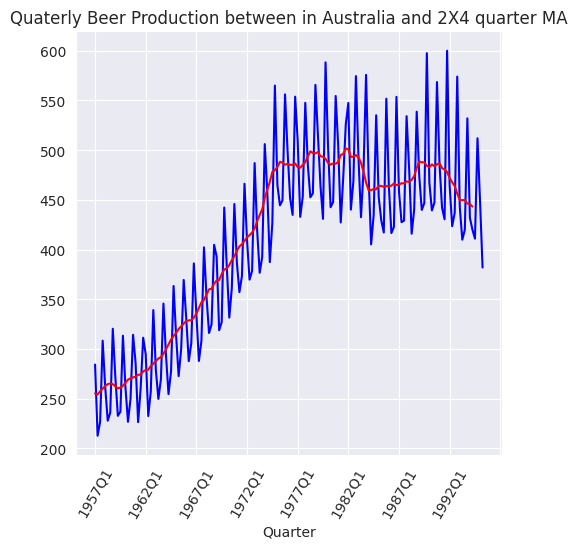

In [151]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
beer_df['Beer_Prod'].plot(ax=ax, color='b', linestyle='-')
TwoXMA4.plot(ax=ax, color='r', linestyle='-')
plt.xticks(rotation=60);
ax.set_title('Quaterly Beer Production between in Australia and 2X4 quarter MA');

- La serie de ***producción trimestral de cerveza*** muestra tanto ***tendencia como estacionalidad***, lo que la hace ***no estacionaria***. Para abordar esto, ***primero eliminamos el componente de tendencia y luego consideramos las diferencias estacionales***. Los residuos resultantes después de eliminar la tendencia se muestran en la siguiente figura.

In [152]:
residuals = beer_df['Beer_Prod']-TwoXMA4
residuals = residuals.loc[~pd.isnull(residuals)]

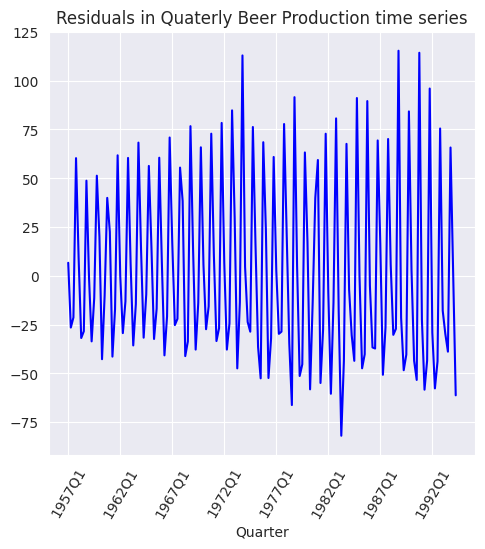

In [153]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax=ax, color='b', linestyle='-')
plt.xticks(rotation=60);
ax.set_title('Residuals in Quaterly Beer Production time series');

- En este punto ***comprobaremos si los residuos ya están estacionados*** (aunque poco probable) trazando la ***función de autocorrelación junto con los intervalos de confianza del 99%***. Para obtener este gráfico, que se muestra aquí, utilizaremos la función `autocorrelation_plot` de la **API** `pandas.plotting`

In [154]:
from pandas.plotting import autocorrelation_plot

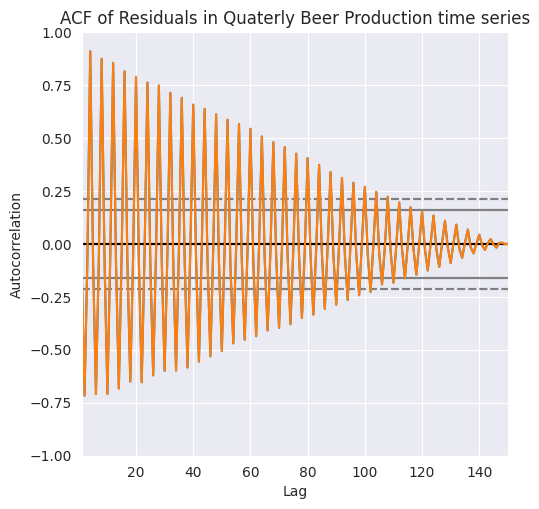

In [155]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax=ax)
ax.set_title('ACF of Residuals in Quaterly Beer Production time series');
autocorrelation_plot(residuals);

- Los ***residuos exhiben una autocorrelación significativa***, como se evidencia en el ***ACF***, con varios rezagos superando los intervalos de confianza. Por lo tanto, ***debemos aplicar diferencias estacionales en los residuos***. Dado que los datos originales abarcan todos los trimestres de varios años, y muestran ***estacionalidad trimestral***, optamos por ***diferencias a lo largo de periodos de cuatro unidades de tiempo***.

In [156]:
residuals_qtr_diff = residuals.diff(4)

- Removemos todos los valores faltantes `NaNs`

In [157]:
residuals_qtr_diff = residuals_qtr_diff.loc[~pd.isnull(residuals_qtr_diff)]

- `residuals_qtr_diff` parece ***representar fluctuaciones aleatorias sin patrones estacionales ni autocorrelación notable***. Al trazar la autocorrelación de `residuals_qtr_diff`, observamos una ACF principalmente aleatoria, con ***solo dos rezagos que superan los intervalos de confianza del 99%***. Esto sugiere que las diferencias estacionales han logrado estacionar los residuos.

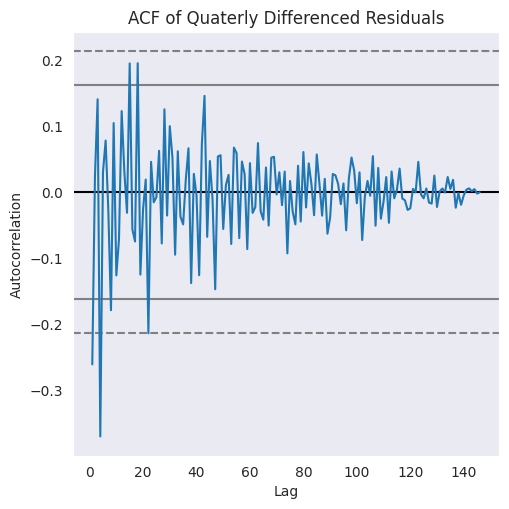

In [158]:
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax=ax)
ax.set_title('ACF of Quaterly Differenced Residuals');

In [159]:
_, _, _, pval_monthly_mean = stattools.acf(residuals_qtr_diff,
                                           nlags=10, 
                                           qstat=True, 
                                           alpha=0.05)
print('Null hypothesis is rejected for lags:', np.where(pval_monthly_mean<=0.05))

Null hypothesis is rejected for lags: (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),)


- Nuestro ***enfoque para estacionar la serie temporal de producción de cerveza trimestral*** puede ser resumir como sigue:
    1. Tomar estacionalidad **MA** $\overline{\widehat{M}_{t}^{(4)}}^{(t, t+1)}$
    2. ***Calcule los residuos***, restando $y_{t}$ de la **MA** $\overline{\widehat{M}_{t}^{(4)}}^{(t, t+1)}$ de la serie de tiempo original
    3. ***Comprobar aleatoriedad/independencia de la ACF*** de los residuos
    4. Si el **ACF** de los residuos ya es aleatorio/independiente, entonces los ***residuos son estacionarios, si no pase a la etapa siguiente***.
    5. ***Tome diferencias estacionales en los residuos con periodicidad de cuatro*** y compruebe la aleatoriedad de la **ACF** de la serie diferenciada.

- Por lo tanto, ***las medias móviles estacionales y las diferencias estacionales en los residuos*** han *estacionado la serie temporal original*.

## Media móvil ponderada

- En la sección anterior, expresamos las ***medias móviles de la forma*** $\overline{\widehat{M}_{t}^{(4)}}^{(t-i, t+j)}$ como ***suma ponderada de las observaciones de la serie temporal original***. Vimos cómo las ***ponderaciones caen para observaciones alejadas del índice temporal*** en el que se calcula la **MA**. La noción de ***medias móviles ponderadas***, que es simétrica, puede generalizarse para cualquier aplicación de la siguiente manera:

  $$\widehat{W}_{t}^{(k)}=w_{t-k}y_{t-k}+w_{t-k+1}y_{t-k+1}+\cdots+w_{t}y_{t}+\cdots+w_{t+k-1}y_{t+k-1}+w_{t+k}y_{t+k},$$

  donde los pesos $w_{t-k}+w_{t-k+1}+\cdots+w_{t-k-1}+w_{t+k}=1$. Las ***observaciones cercanas al índice de tiempo*** $t$ ***se les asigna una mayor ponderación***, mientras que las más alejadas reciben una ponderación menor.

- Para un simple **MA** $\widehat{W}_{t}^{(k)}$ los pesos son $1/N,~N\in\mathbb{Z}^{+}$. Se ha observado que el **MA** ***ponderado produce una estimación más suave del ciclo de la tendencia***. Esto se atribuye al hecho de que ***todas las observaciones de la serie temporal original***, que se utilizan para calcular el **MA** ponderado, ***no se ponderan usando el mismo peso como en el caso de una*** **MA** $\widehat{M}_{t}^{(k)}$. 

## Descomposición de series temporales mediante medias móviles

- Las medias móviles se utilizan para ***suavizar la serie original y estimar el componente de ciclo de la tendencia***. La elección de los parámetros es crucial, siendo la periodicidad de los datos un factor determinante. En el caso de una periodicidad par, se ajusta para obtener una mejor estimación. La ***estimación del componente estacional se genera a partir de la media estacional de los residuos***. Los ***cálculos difieren entre modelos aditivos y multiplicativos***.

- Finalmente, las ***variaciones irregulares*** se obtienen mediante ***ajustes adicionales de la serie original***. Se ilustra este enfoque con la serie temporal de los ***kilómetros mensuales de las aeronaves voladas por US Airlines***, aplicando ***modelos aditivos y multiplicativos***

In [160]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from matplotlib import pyplot as plt

In [161]:
air_miles = pd.read_csv('/home/lihkir/Data/us-airlines-monthly-aircraft-miles-flown.csv')
air_miles.index = air_miles['Month']

In [162]:
print('Shape of the DataFrame:', air_miles.shape)
air_miles.head()

Shape of the DataFrame: (97, 2)


,Month,U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


- Cambiemos el nombre de la segunda columna

In [163]:
air_miles.rename(columns={'U.S. airlines: monthly aircraft miles flown (Millions) 1963 -1970': 'Air miles flown'}, 
                 inplace=True)
air_miles.head()

,Month,Air miles flown
Month,,
1963-01,1963-01,6827.0
1963-02,1963-02,6178.0
1963-03,1963-03,7084.0
1963-04,1963-04,8162.0
1963-05,1963-05,8462.0


- Comprobar si existen datos faltantes y los eliminamos

In [164]:
missing = pd.isnull(air_miles['Air miles flown'])
print('Number of missing values found:', missing.sum())
air_miles = air_miles.loc[~missing, :]

Number of missing values found: 1


- Estimamos el ***componente de tendencia mediante la media móvil mensual 2X12***

In [165]:
MA12 = air_miles['Air miles flown'].rolling(window=12).mean()
trendComp = MA12.rolling(window=2).mean()

- Para el ***modelo aditivo***, el componente estacional se obtiene ***restando la tendencia-ciclo de la serie temporal original*** y tomando las medias mensuales de los residuos. La operación de agrupación para calcular el componente estacional de la siguiente manera

In [166]:
residuals = air_miles['Air miles flown'] - trendComp

month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.values]*nb_years).reshape((12*nb_years,))

- Dadas las ***estimaciones de los componentes de tendencia-ciclo y estacional***, obtenemos las ***variaciones irregulares*** como sigue para un modelo aditivo

In [167]:
irr_var = air_miles['Air miles flown'] - trendComp - seasonalComp

- La ***serie temporal original***, los ***componentes de tendencia-ciclo***, ***estacional*** e ***irregular*** se muestran en la siguiente figura

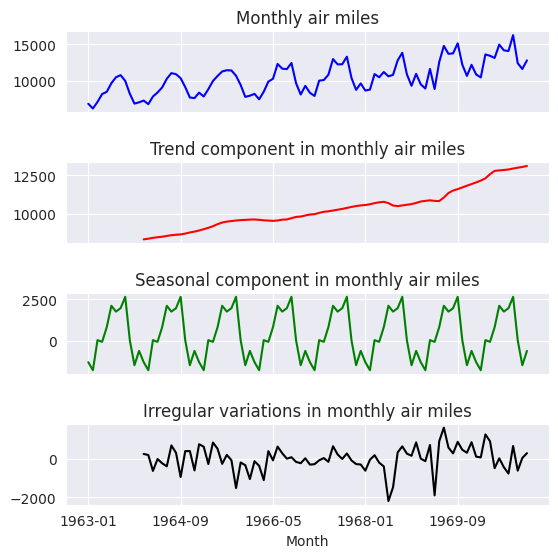

In [168]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- La ***prueba ADF*** de `irr_var` da un valor $p$ de 0.0658. Con un nivel de confianza del 90% ($\alpha$=0.10) la ***hipótesis nula sobre la no estacionariedad de las variaciones irregulares puede aceptarse***. Sin embargo, vamos a intentar ***mejorar aún más mediante el modelo multiplicativo***.

In [169]:
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.06577411025730062


- La estimación del ciclo de la tendencia mediante **MA** es aplicable incluso para el modelo multiplicativo. Sin embargo, ***el cálculo del componente estacional cambia***

In [170]:
residuals = air_miles['Air miles flown'] / trendComp

- Obsérvese que los ***residuos estacionales*** `residuals` ***dividen el componente de tendencia-ciclo de la serie temporal original*** en el caso de un modelo multiplicativo. Sin embargo, la operación de agrupación en los residuos sigue siendo la misma

In [171]:
month = air_miles['Month'].map(lambda d: d[-2:])
monthwise_avg = residuals.groupby(by=month).aggregate(['mean'])
nb_years = 1970-1963+1

seasonalComp = np.array([monthwise_avg.values]*nb_years).reshape((12*nb_years,))

- Finalmente, llegamos a las ***variaciones irregulares para el modelo multiplicativo*** como sigue

In [172]:
irr_var = air_miles['Air miles flown'] / (trendComp * seasonalComp)

- Obsérvese que los ***componentes estacionales e irregulares son de menor magnitud que los obtenidos con el modelo aditivo***

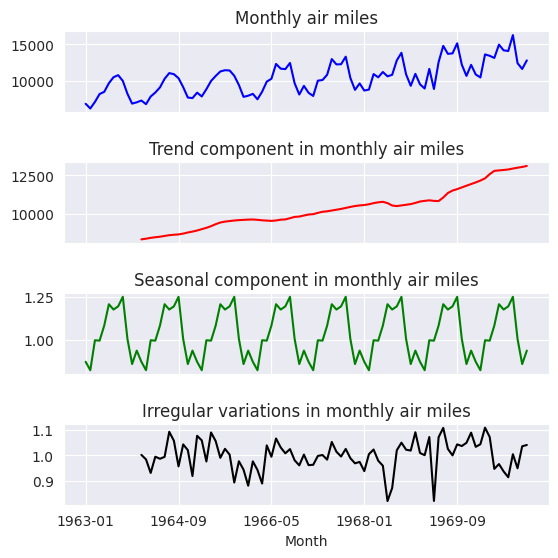

In [173]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

air_miles['Air miles flown'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly air miles')

pd.Series(data=trendComp, index=air_miles.index).plot(ax=axarr[1], color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly air miles')

pd.Series(data=seasonalComp, index=air_miles.index).plot(ax=axarr[2], color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly air miles')

pd.Series(data=irr_var, index=air_miles.index).plot(ax=axarr[3], color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly air miles')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

- La ***prueba ADF sobre las variaciones irregulares*** obtenida del modelo multiplicativo da un valor $p$ de aproximadamente 0.00018, que es mucho menor que el obtenido con el modelo aditivo. Sobre todo, ***menor que el nivel de significancia del 0.01***.

In [174]:
adf_result = stattools.adfuller(irr_var.loc[~pd.isnull(irr_var)], autolag='AIC')
print('p-val of the ADF test on irregular variations in air miles flown:', adf_result[1])

p-val of the ADF test on irregular variations in air miles flown: 0.00017645280908370881


## Descomposición de series temporales mediante `statsmodels.tsa`

- Analizamos el uso de ***MA para estimar tendencias y estacionalidad en series temporales***. Sin embargo, para ***patrones más complejos***, como cambios en la estacionalidad, ***recurrimos al método*** [STL](https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.STL.html) {cite}`cleveland1990stl` en que se usa [Regresión Local (LOESS)](https://es.wikipedia.org/wiki/Regresi%C3%B3n_local) en el proceso de suavización. En esta sección, emplearemos `statsmodels.tsa` en `Python` para ***estimar tendencias, ciclos y estacionalidad***, luego ***aplicaremos la prueba ADF para verificar la estacionariedad de los datos***.

- Consideremos la ***serie temporal del empleo mensual en Wisconsin, Estados Unidos***, para ilustrar el enfoque antes mencionado. Los datos corresponden al ***periodo comprendido entre enero de 1961 y octubre de 1975***. Comenzamos cargando el conjunto de datos en un `pandas.DataFrame` `wisc_emp` y ejecutando la prueba **ADF** para la serie temporal original como sigue

In [175]:
import pandas as pd
import numpy as np
from statsmodels.tsa import stattools
from statsmodels.tsa import seasonal
from matplotlib import pyplot as plt

In [176]:
wisc_emp = pd.read_csv('/home/lihkir/Data/wisconsin-employment-time-series.csv')
wisc_emp.index = wisc_emp['Month']

In [177]:
print('Shape of the DataFrame:', wisc_emp.shape)
wisc_emp.head(10)

Shape of the DataFrame: (178, 2)


,Month,Employment
Month,,
1961-01,1961-01,239.6
1961-02,1961-02,236.4
1961-03,1961-03,236.8
1961-04,1961-04,241.5
1961-05,1961-05,243.7
1961-06,1961-06,246.1
1961-07,1961-07,244.1
1961-08,1961-08,244.2
1961-09,1961-09,244.8


In [178]:
missing = (pd.isnull(wisc_emp['Employment'])) | (pd.isnull(wisc_emp['Month']))
print('Number of missing values found:', missing.sum())
wisc_emp = wisc_emp.loc[~missing, :]

Number of missing values found: 0


In [179]:
adf_result = stattools.adfuller(wisc_emp['Employment'], autolag='AIC')
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.9810000189539195


- Un valor $p$ ***elevado de 0.9810 para la prueba ADF*** de la serie mensual de empleo ***indica que la serie temporal original es no estacionaria***. Por lo tanto, intentamos ***descomponer la serie temporal y, en consecuencia, estacionarla*** utilizando la función `seasonal.seasonal_decompose` de la librería `statsmodels.tsa`. Intentemos primero el modelo aditivo para la descomposición

In [180]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), period=12, model='additive')

- El argumento `period` en el `seasonal.seasonal_decompose` es la ***periodicidad del comportamiento estacional y la serie temporal original***, al ser ***observaciones mensuales, sospechamos una periodicidad de 12***, que puede verificarse mediante un análisis exploratorio de los datos.

-  Los ***componentes de tendencia-ciclo, estacional y residual*** de la serie temporal descompuesta son accesibles a través de los atributos del objeto `decompose_model` devuelto por el `seasonal.seasonal_decompose`. Estos componentes se pueden obtener a partir de los siguientes ***atributos de*** `decompose_model`:

    - `decompose_model.trend`: Componente de ***ciclo de tendencia***
    - `decompose_model.seasonal`: Componente ***estacional***
    - `decompose_model.resid`: Variaciones ***irregulares***

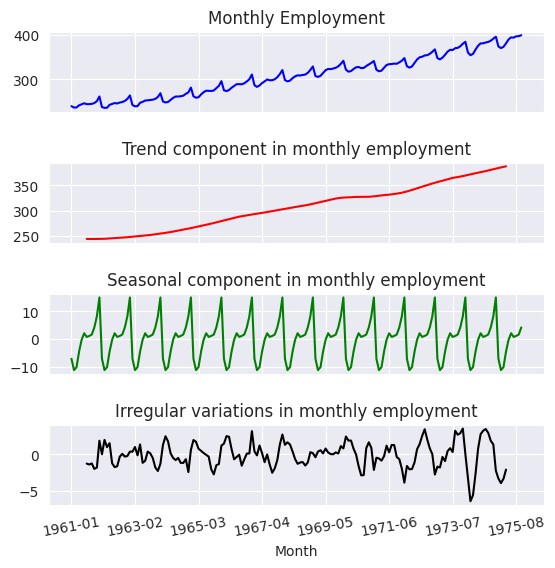

In [181]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment')

pd.Series(data=decompose_model.trend, index=wisc_emp.index).plot(color='r', linestyle='-', ax=axarr[1])
axarr[1].set_title('Trend component in monthly employment')

pd.Series(data=decompose_model.seasonal, index=wisc_emp.index).plot(color='g', linestyle='-', ax=axarr[2])
axarr[2].set_title('Seasonal component in monthly employment')

pd.Series(data=decompose_model.resid, index=wisc_emp.index).plot(color='k', linestyle='-', ax=axarr[3])
axarr[3].set_title('Irregular variations in monthly employment')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0);
plt.xticks(rotation=10);

- Ahora ejecutamos la prueba ***ADF sobre los residuos del modelo aditivo y obtenemos un valor*** $p$ ***de 0.00656***, que es mucho menor que el obtenido con la serie temporal original. Sin embargo, ***construiremos también un modelo multiplicativo***

In [182]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], 
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.006560931634642831


In [183]:
decompose_model = seasonal.seasonal_decompose(wisc_emp.Employment.tolist(), period=12, model='multiplicative')

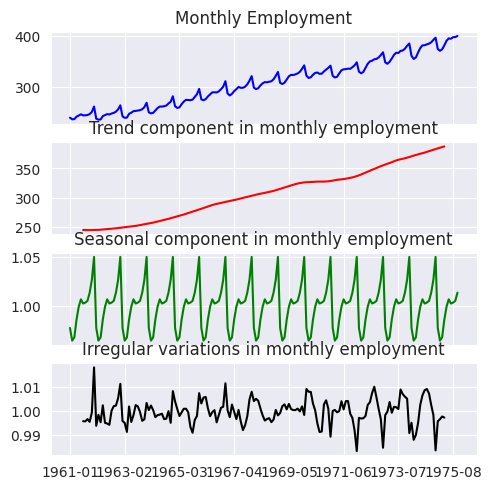

In [184]:
fig, axarr = plt.subplots(4, sharex=True)
fig.set_size_inches(5.5, 5.5)

wisc_emp['Employment'].plot(ax=axarr[0], color='b', linestyle='-')
axarr[0].set_title('Monthly Employment');

axarr[1].plot(decompose_model.trend, color='r', linestyle='-')
axarr[1].set_title('Trend component in monthly employment');

axarr[2].plot(decompose_model.seasonal, color='g', linestyle='-')
axarr[2].set_title('Seasonal component in monthly employment');

axarr[3].plot(decompose_model.resid, color='k', linestyle='-')
axarr[3].set_title('Irregular variations in monthly employment');

- La prueba ***ADF sobre los residuos de la descomposición multiplicativa da un valor*** $p$ ***de 0.00123*** que es incluso ***menor que el obtenido con la descomposición aditiva***. Con un nivel de confianza del 99% ($\alpha$=0.01) ***podemos rechazar la hipótesis nula de la prueba ADF*** y concluir que ***los residuos del modelo de descomposición multiplicativa corresponden a una serie estacionaria***

In [185]:
adf_result = stattools.adfuller(decompose_model.resid[np.where(np.isfinite(decompose_model.resid))[0]], 
                                autolag='AIC')
print('p-val of the ADF test on irregular variations in employment data:', adf_result[1])

p-val of the ADF test on irregular variations in employment data: 0.0012347837267736395


## Residual y error de predicción

````{prf:definition}
:label: forecast_error

- Supongamos que se dispone de $T$ ***periodos de datos disponibles***, siendo el periodo $T$ ***el más reciente***. Denotemos por $y_{t}$ la ***observación de esta variable en el periodo de tiempo*** $t,~t = 1,2,\dots, T$. 

- En general, tendremos que distinguir entre una ***predicción o valor predicho*** de $y_{t}$ ***que se hizo en algún periodo de tiempo previo***, digamos, $t-\tau$ y un ***valor ajustado*** de $y_{t}$ que ha resultado de la estimación de los parámetros de un modelo de series temporales a datos históricos. Tenga en cuenta que $\tau$ es el ***horizonte de predicción***. 

- La ***predicción realizada en el periodo de tiempo*** $t-\tau$ ***se denota por*** $\hat{y}_{t}(t-\tau)$. Hay mucho interés en la predicción basada en el tiempo previo $\text{lead}-1$, que es la ***predicción de la observación en el periodo*** $t$, $y_{t}$, ***realizada un periodo previo***, $\hat{y}_{t}(t - 1)$. 

- Denotaremos el ***valor ajustado de*** $y_{t}$ por $\hat{y}_{t}$. También nos interesará analizar los ***errores de predicción***. El error de predicción que resulta de una predicción de $y_{t}$ que se realizó en el periodo de tiempo $t-\tau$ es el ***`error de predicción`*** $\text{lead} - \tau$

    $$
    \\[2mm]
    e_{t}(\tau)=y_{t}-\hat{y}_{t}(t-\tau).
    $$

    Por ejemplo, el error de predicción $\text{lead} - 1$ es

$$
e_{t}(1)=y_{t}-\hat{y}_{t}(t-1).
$$

- La ***diferencia entre la observación*** $y_{t}$ ***y el valor obtenido ajustando un modelo de series temporales*** a los datos, o un valor ajustado $\hat{y}_{t}$ definido anteriormente, se denomina ***`residual`***, y se denota por

$$
e_{t}=y_{t}-\hat{y}_{t}.
$$
````

```{admonition} Observación
:class: tip

- La razón de esta cuidadosa distinción entre ***`error de predicción`*** y ***`residual`*** es que ***los modelos suelen ajustarse mejor a los datos históricos de lo que pronostican***. 

- Es decir, los ***residuos de un proceso de ajuste de modelo casi siempre serán menores que los errores de predicción*** que se experimentan cuando ese modelo se utiliza para pronosticar observaciones futuras.
```

## Evaluando y monitoreando el desempeño del modelo predictivo

````{admonition} Introducción
:class: tip

- El ***desempeño o rendimiento de un modelo predictivo*** está relacionado con el ***ajuste del pronóstico o modelo de series temporales a datos historicos***. Los usuarios de un modelo predictivo están siempre interesados la ***precisión de futuras predicciones***, no en la bondad de ajuste del modelo, por lo tanto, es importante ***evaluar este aspecto de cualquier modelo recomendado***

- En algunos casos, la precisión de predicción es llamada ***error de predicción "out of sample"***, para ***distinguir esta del residual que proviene del proceso de ajuste del modelo***. Cuando mas de una técnica  predictiva parece razonable para una aplicación en particular, estas medidas de precisión del pronóstico pueden ser usadas para ***discriminar entre modelos que compiten entre ellos***.

````

````{admonition} Rendimiento del modelo predictivo

- Es habitual evaluar el ***rendimiento de un modelo*** usando el ***error de pronóstico one-step-ahead***

    $$
    e_{t}(1)=y_{t}-\hat{y}_{t}(t-1)
    $$

    donde $\hat{y}_{t}(t-1)$ es la ***predicción de*** $y_{t}$ ***que fue hecha en el periodo previo***. Errores de pronósticos en otros rezagos (lags), si está interesado en estos pronósticos particulares.

- Suponga que hay $n$ observaciones para las cuales pronósticos han sido realizados y $n$ errores one-step-ahead, $e_{t}(1),~t=1,2,\dots, n$. Medidas estándar de ***precisión del pronóstico son*** el ***error promedio o error medio***

    $$
    \text{ME}=\frac{1}{n}\sum_{t=1}^{n}e_{t}(1),
    $$

    la ***desviación media absoluta*** (o ***error absoluto medio***)

    $$
    \text{MAD}=\frac{1}{n}\sum_{t=1}^{n}|e_{t}(1)|,
    $$

    y el ***error cuadrático medio***

    $$
    \text{MSE}=\frac{1}{n}\sum_{t=1}^{n}[e_{t}(1)]^{2}
    $$

- Claramente, queremos que la ***variabilidad del error de pronóstico sea pequeña***. El MSE es un ***estimador directo de la varianza del error de predicción one-step-ahead***

    $$
    \hat{\sigma}_{e(1)}^{2}=\text{MSE}=\frac{1}{n}\sum_{t=1}^{n}[e_{t}(1)]^{2}.
    $$

- Si los ***errores de predicción están normalmente distribuidos***, el MAD es relacionado con la ***desviación estándar de los errores de predicción*** por

    $$
    \hat{\sigma}_{e(1)}=\sqrt{\frac{\pi}{2}}\text{MAD}\approx 1.25\text{MAD}.
    $$

- Además, las ***medidas de precisión que son dependientes de la escala*** no facilitan comparaciones de una técnica predictiva a través de diferentes series de tiempo, o comparación a través de diferentes periodos de tiempo. Para solucionar esto, definimos el ***error de predicción relativo*** (en ***porcentaje***) como

    $$
    re_{t}(1)=\left(\frac{y_{t}-\hat{y}_{t}(t-1)}{y_{t}}\right)100=\left(\frac{e_{t}(1)}{y_{t}}\right)100.
    $$

- La anterior métrica es llamada el ***error de pronóstico porcentual***. La ***media del error de pronóstico porcentual*** (MPE) es

    $$
    \text{MPE}=\frac{1}{n}\sum_{t=1}^{n}re_{t}(1)
    $$

    y la ***media absoluta del error de pronóstico porcentual*** (MAPE) es

    $$
    \text{MAPE}=\frac{1}{n}\sum_{t=1}^{n}|re_{t}(1)|.
    $$

- Nótese que el ***error de pronóstico porcentual relativo*** solo tiene sentido *si la serie de tiempo* $y_{t}$ *no tiene valores nulos*.
````

- Si una ***serie temporal es ruido blanco***, la ***distribución del coeficiente de autocorrelación muestral*** en el rezago $k$ en muestras grandes es ***aproximadamente normal con media cero y varianza*** $1/T$; es decir,

  $$
  r_{k}\sim N\left(0, \frac{1}{T}\right).
  $$

- Por lo tanto, podríamos ***probar la hipótesis*** $H_{0}:~\rho_{k} = 0$ utilizando el ***estadístico de prueba***

  $$
  Z_{0}=\frac{r_{k}}{\sqrt{1/T}}=r_{k}\sqrt{T}.
  $$(test_statistic_acf_normal_dist)

- Este procedimiento es una prueba one-at-a-time; es decir, ***el nivel de significancia se aplica a las autocorrelaciones consideradas individualmente***. A menudo, ***estamos interesados en evaluar un conjunto de autocorrelaciones conjuntamente para determinar si indican que la serie temporal es ruido blanco***. {cite}`box1970distribution` han sugerido dicho procedimiento.

````{admonition} Box-Pierce test
:class: tip

- Considera el ***cuadrado del estadístico de prueba*** $Z_{0}$ en la Ecuación {eq}`test_statistic_acf_normal_dist`. La distribución de $Z_{0}^{2} = r_{k}^{2}T$ es ***aproximadamente chi-cuadrado*** con ***un grado de libertad***. El ***estadístico de Box-Pierce***

  $$
  Q_{BP}=T\sum_{k=1}^{K}r_{k}^{2}
  $$

  bajo la ***hipótesis nula de que la serie temporal es ruido blanco***, tiene una ***distribución chi-cuadrado aproximada*** con $K$ grados de libertad. Por lo tanto, si $Q_{BP} > \chi_{\alpha, K}^{2}$, ***rechazaríamos la hipótesis nula y concluiríamos que la serie temporal no es ruido blanco*** porque algunas de las autocorrelaciones no son cero.
````

- Una ***modificación*** de esta prueba que ***funciona mejor para muestras pequeñas*** fue ideada por {cite}`ljung1978measure`. El ***estadístico de bondad de ajuste*** de ***`Ljung-Box`*** es 

  $$
  Q_{LB}=T(T+2)\sum_{k=1}^{K}\left(\frac{1}{T-k}\right)r_{k}^{2}.
  $$

- Es importante destacar que ***el estadístico de bondad de ajuste de Ljung-Box es muy similar a la estadística original de Box-Pierce***, la diferencia radica en que la ***autocorrelación muestral al cuadrado en el rezago*** $k$ ***está ponderada por*** $(T + 2)∕(T − k)$. Para valores grandes de $T$, estos pesos serán aproximadamente unitarios, por lo que los estadísticos $Q_{LB}$ y $Q_{BP}$ serán muy similares (***`bonus`***).

## Elegir entre modelos que compiten

````{admonition} Introducción
- A menudo hay varios modelos que compiten, los cuales se pueden utilizar para predecir una serie temporal específica. Por ejemplo, existen ***varias formas de modelar y pronosticar tendencias***. En consecuencia, ***seleccionar un modelo de pronóstico apropiado es de considerable importancia práctica***. 

- En esta sección discutimos algunos principios generales de ***selección de modelos***. En capítulos posteriores, ilustraremos cómo se aplican estos principios en situaciones específicas.
````

- Al evaluar el ***ajuste del modelo a los datos históricos***, hay varios criterios que pueden ser de valor. El ***error cuadrático medio de los residuos*** es

  $$
  s^{2}=\frac{\displaystyle{\sum_{t=1}^{T}e_{t}^{2}}}{T-p}
  $$

  donde $T$ ***periodos de datos se han utilizado para ajustar un modelo*** con $p$ ***parámetros*** y $e_{t}$ es el ***residuo del proceso de ajuste del modelo*** en el período $t$. El error cuadrático medio $s^{2}$ es simplemente la ***varianza muestral de los residuos*** y es un ***estimador de la varianza de los errores del modelo***.

- Otro criterio es el ***estadístico*** $R$***-cuadrado***

  $$
  R^{2}=1-\frac{\displaystyle{\sum_{t=1}^{T}e_{t}^{2}}}{\displaystyle{\sum_{t=1}^{T}(y_{t}-\overline{y})^{2}}}
  $$(r2_test_goodnessoffit)

- El ***denominador*** de la Ecuación {eq}`r2_test_goodnessoffit` es simplemente la ***suma total de cuadrados de las observaciones***, que es constante (*no depende del modelo*), y el ***numerador*** es simplemente la ***suma residual de cuadrados***.

````{admonition} Observación
:class: tip

- ***Seleccionar el modelo que maximiza el*** $R^2$ es equivalente a ***seleccionar el modelo que minimiza la suma de los residuos al cuadrado***. ***Valores grandes de*** $R^2$ ***sugieren un buen ajuste a los datos históricos***. 

- Debido a que la ***suma residual de cuadrados siempre disminuye cuando se agregan parámetros a un modelo***, confiar en $R^2$ ***para seleccionar un modelo de pronóstico, fomenta el sobreajuste*** o la inclusión de más parámetros de los realmente necesarios para obtener buenos pronósticos. Un ***valor grande de*** $R^2$ ***no garantiza que los errores de pronóstico fuera de la muestra*** a un paso adelante ***sean pequeños***.

````

- Un mejor criterio es el ***estadístico*** $R^2$ ***"ajustado"***, definido como

  $$
  R_{\text{Adj}}^{2}=1-\frac{\displaystyle{\sum_{t=1}^{T}e_{t}^{2}/(T-p)}}{\displaystyle{\sum_{t=1}^{T}(y_{t}-\overline{y})^{2}/(T-1)}}=\frac{s^{2}}{\displaystyle{\sum_{t=1}^{T}(y_{t}-\overline{y})^{2}/(T-1)}}.
  $$

- El ajuste es un ***ajuste "de tamaño"***, es decir, ***ajusta según el número de parámetros en el modelo***. Es importante destacar que ***un modelo que maximiza el estadístico*** $R^2$ ***ajustado, también es el modelo que minimiza el cuadrado medio residual***.

````{admonition} AIC y BIC

- Otros dos criterios importantes son el ***Criterio de Información de Akaike (AIC)*** {cite}`akaike1974new` y el ***Criterio de Información Bayesiano de Schwarz*** (abreviado como ***BIC*** o ***SIC*** por varios autores) {cite}`schwarz1978estimating`:

    $$
    AIC=\ln\left(\frac{\displaystyle{\sum_{t=1}^{T}e_{t}^{2}}}{T}\right)+\frac{2p}{T}\quad\text{y}\quad BIC=\ln\left(\frac{\displaystyle{\sum_{t=1}^{T}e_{t}^{2}}}{T}\right)+\frac{p\ln(T)}{T}.
    $$
````

- Estos dos criterios ***penalizan la suma de los residuos al cuadrado por incluir parámetros adicionales en el modelo***. Los modelos que tienen ***valores pequeños de AIC o BIC se consideran buenos modelos***.

````{admonition} Observación
:class: tip 

- Un criterio de ***selección de modelos es `consistente` si*** selecciona el modelo verdadero cuando ***el modelo verdadero está entre los considerados con una probabilidad que se aproxima a la unidad a medida que el tamaño de la muestra se vuelve grande***. 

- Resulta que $s^{2}$, ***el*** $R^2$ ***ajustado y el AIC no son consistentes, porque no penalizan lo suficiente por agregar parámetros***. Confiar en estos criterios tiende a resultar en ***sobreajuste***. El ***BIC, que tiene una penalización más fuerte por el "ajuste de tamaño", es consistente***.

- Los ***criterios de consistencia no revelan toda la situación***. Aunque un criterio puede ser ***asintóticamente eficiente, como el AIC***, ***esto no garantiza una selección ideal del modelo*** en situaciones donde el modelo verdadero y sus aproximaciones son altamente complejos.
````

````{admonition} AIC corregido

- Existen varias ***variaciones y extensiones de estos criterios***. El AIC es un estimador sesgado de la discrepancia entre todos los modelos candidatos y el verdadero modelo. Esto ha llevado al desarrollo de una ***versión “corregida” del AIC*** {cite}`hurvich1989regression`:

    $$
    AIC_{c}=\ln\left(\frac{\displaystyle{\sum_{t=1}^{T}e_{t}^{2}}}{T}\right)+\frac{2T(p+1)}{T-p-2}.
    $$

- Así, $AIC_{c}$ ***es esencialmente AIC con un término adicional de penalización*** por el número de parámetros.
````

````{admonition} Observación 
- A veces vemos que el primer término en el AIC, AICc o BIC se escribe como $-2\ln L(\boldsymbol{\beta}, \sigma^{2})$, donde $L(\boldsymbol{\beta}, \sigma^{2})$ es la ***función de verosimilitud*** para el modelo ajustado evaluado en las estimaciones de máxima verosimilitud de los parámetros desconocidos $\boldsymbol{\beta}$ y  $\sigma^{2}$. En este contexto, AIC, AICc y SIC se llaman ***criterios de verosimilitud penalizados***.
````

````{admonition} Resumen
:class: tip

- Comenzamos este capítulo hablando de técnicas avanzadas de procesamiento de datos, como el ***remuestreo, el agrupamiento y el cálculo de ventanas móviles para obtener estadísticos agregados de una serie temporal***. A continuación, describimos las series temporales estacionarias y analizamos las pruebas estadísticas de hipótesis como la ***prueba de `Ljung-Box` y la prueba de `Dickey Fuller` aumentada*** para verificar estacionariedad de una serie temporal. 

- La estacionariedad de las series temporales no estacionarias es importante para la predicción de series temporales. Por lo tanto, discutimos dos enfoques diferentes para ***estacionar las series temporales***. En primer lugar, el método de ***diferenciación, que abarca la primera, la segunda y la diferenciación estacional***, se ha descrito para estacionar una serie temporal no estacionaria. 

- En segundo lugar, la ***descomposición de las series temporales utilizando la librería*** `statsmodels.tsa` para modelos aditivos y multiplicativos. En el siguiente capítulo, se profundiza en las técnicas de suavización exponencial que tratan con datos de series temporales ruidosos.
````